## Run data pipeline
Returns an aggegrated df to work with

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pip install tqdm


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
#Copy this cell to every new version of Main
#import dataframe
df = pd.read_parquet('/home/joelva/code/pgt-group-3/data/raw/Daily_pivoted/daily_df.parquet')

# Print the number of rows
print(f"Number of rows in the file: {len(df)}")

Number of rows in the file: 201


In [4]:
#Check for NANs 
import pandas as pd


nan_counts_df = df.isna().sum()

# Convert to string with no line width limit
nan_counts_str = nan_counts_df.to_string()

print(nan_counts_str)

date                   0
DayOfWeek              0
AvgThrottlePerc        0
AvgBrakePerc           0
AvgMotorTemp           0
Avg24VBatt             0
AvgBattOutputPower     3
AvgMotorPowerDraw      0
AvgTotalFCPower        1
AvgTotalPowerDraw      0
AvgMotorRPM            0
AvgMotorTorque         0
NetWeight_4            0
NetWeight_5            0
NetWeight_6            0
NetWeight_7            0
NetWeight_8            0
NetWeight_9            0
NetWeight_10           0
NetWeight_11           0
NetWeight_12           0
Distance_4             0
Distance_5             0
Distance_6             0
Distance_7             0
Distance_8             0
Distance_9             0
Distance_10            0
Distance_11            0
Distance_12            0
Distance_13            0
H2Hour_4               0
H2Hour_5               0
H2Hour_6               0
H2Hour_7               0
H2Hour_8               0
H2Hour_9               0
H2Hour_10              0
H2Hour_11              0
H2Hour_12              0


In [5]:
# Toon de kolomnamen
print(df.columns)

Index(['date', 'DayOfWeek', 'AvgThrottlePerc', 'AvgBrakePerc', 'AvgMotorTemp',
       'Avg24VBatt', 'AvgBattOutputPower', 'AvgMotorPowerDraw',
       'AvgTotalFCPower', 'AvgTotalPowerDraw', 'AvgMotorRPM', 'AvgMotorTorque',
       'NetWeight_4', 'NetWeight_5', 'NetWeight_6', 'NetWeight_7',
       'NetWeight_8', 'NetWeight_9', 'NetWeight_10', 'NetWeight_11',
       'NetWeight_12', 'Distance_4', 'Distance_5', 'Distance_6', 'Distance_7',
       'Distance_8', 'Distance_9', 'Distance_10', 'Distance_11', 'Distance_12',
       'Distance_13', 'H2Hour_4', 'H2Hour_5', 'H2Hour_6', 'H2Hour_7',
       'H2Hour_8', 'H2Hour_9', 'H2Hour_10', 'H2Hour_11', 'H2Hour_12',
       'H2Hour_13', 'H2Daily', 'NetWeightDaily', 'TotalDistanceKM', 'EEM1',
       'EEM2', 'H2perKM', 'WeightperKM', 'H2perWeight', 'AvgWeatherTemp',
       'Is_Friday', 'Is_Monday', 'Is_Thursday', 'Is_Tuesday', 'Is_Wednesday',
       'BatSOC_4', 'ThrottlePerc_4', 'BatSOC_5', 'ThrottlePerc_5', 'BatSOC_6',
       'ThrottlePerc_6', 'BatSOC_7'

## Import utilities
Import custom function

In [6]:
#Copy this cell to every new version of Main
%run "Utilities.ipynb" 

In [7]:
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
#check min/max values and number of rows
import pandas as pd

min_datetime = df['date'].min()
max_datetime = df['date'].max()

print(f"Minimum datetime: {min_datetime}")
print(f"Maximum datetime: {max_datetime}")

df.shape
print(df.shape)

Minimum datetime: 2022-08-01
Maximum datetime: 2023-08-01
(201, 73)


In [9]:
#Copy this cell to every new version of Main 
# List data types of each column
dtypes_result = df.dtypes

# Display descriptive statistics for numerical columns
describe_result = df.describe()

# Combine both results in one code snippet
combined_result = pd.concat([dtypes_result, describe_result], axis=1, keys=['Data Types', 'Statistics'])

# Display the combined result
print(combined_result)


                Data Types      Statistics                            \
                         0 AvgThrottlePerc AvgBrakePerc AvgMotorTemp   
date                object             NaN          NaN          NaN   
DayOfWeek           object             NaN          NaN          NaN   
AvgThrottlePerc    float64             NaN          NaN          NaN   
AvgBrakePerc       float64             NaN          NaN          NaN   
AvgMotorTemp       float64             NaN          NaN          NaN   
...                    ...             ...          ...          ...   
min                    NaN        0.000000     0.000000     0.000000   
25%                    NaN        0.175804     0.044080    25.066360   
50%                    NaN       86.322983     3.626589    54.705400   
75%                    NaN      100.044717     5.737785    62.388708   
max                    NaN      126.512179    29.956372    80.344726   

                                                               

In [10]:
 # Methode 1: Gebruik isna() of isnull() en dan sum()
aantal_nan = df.isna().sum()

# Methode 2: Gebruik any() om te controleren of er minstens één NaN-waarde is
heeft_nan = df.isna().any().any()

# Methode 3: Tel het aantal NaN-waarden in het hele DataFrame
totaal_aantal_nan = df.isna().sum().sum()

# Uitvoer resultaten
print("Aantal NaN per kolom:")
print(aantal_nan)
print("\nHeeft DataFrame NaN-waarden?")
print(heeft_nan)
print("\nTotaal aantal NaN-waarden in DataFrame:")
print(totaal_aantal_nan)

Aantal NaN per kolom:
date                0
DayOfWeek           0
AvgThrottlePerc     0
AvgBrakePerc        0
AvgMotorTemp        0
                   ..
ThrottlePerc_10    15
BatSOC_11          16
ThrottlePerc_11    16
BatSOC_12          15
ThrottlePerc_12    15
Length: 73, dtype: int64

Heeft DataFrame NaN-waarden?
True

Totaal aantal NaN-waarden in DataFrame:
415


In [333]:
#JoeCode check if rows contains all nans
all_nans=df.isna().all(axis=1)

nan_rows=df[all_nans]

print("rows with only nans:")
print(nan_rows)

nan_rows_count = all_nans.sum()
print("Number of rows where all values are NaNs:", nan_rows_count)


rows with only nans:
Empty DataFrame
Columns: [date, DayOfWeek, AvgThrottlePerc, AvgBrakePerc, AvgMotorTemp, Avg24VBatt, AvgBattOutputPower, AvgMotorPowerDraw, AvgTotalFCPower, AvgTotalPowerDraw, AvgMotorRPM, AvgMotorTorque, NetWeight_4, NetWeight_5, NetWeight_6, NetWeight_7, NetWeight_8, NetWeight_9, NetWeight_10, NetWeight_11, NetWeight_12, Distance_4, Distance_5, Distance_6, Distance_7, Distance_8, Distance_9, Distance_10, Distance_11, Distance_12, Distance_13, H2Hour_4, H2Hour_5, H2Hour_6, H2Hour_7, H2Hour_8, H2Hour_9, H2Hour_10, H2Hour_11, H2Hour_12, H2Hour_13, H2Daily, NetWeightDaily, TotalDistanceKM, EEM1, EEM2, H2perKM, WeightperKM, H2perWeight, AvgWeatherTemp, Is_Friday, Is_Monday, Is_Thursday, Is_Tuesday, Is_Wednesday, BatSOC_4, ThrottlePerc_4, BatSOC_5, ThrottlePerc_5, BatSOC_6, ThrottlePerc_6, BatSOC_7, ThrottlePerc_7, BatSOC_8, ThrottlePerc_8, BatSOC_9, ThrottlePerc_9, BatSOC_10, ThrottlePerc_10, BatSOC_11, ThrottlePerc_11, BatSOC_12, ThrottlePerc_12]
Index: []
Number of r

In [11]:
len(df)

201

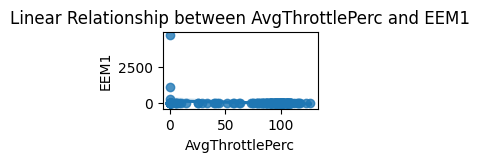

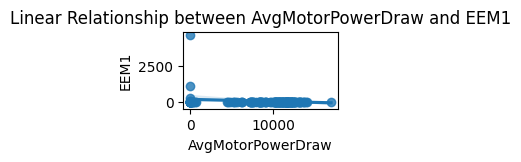

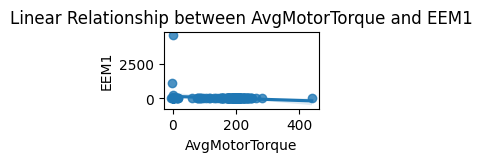

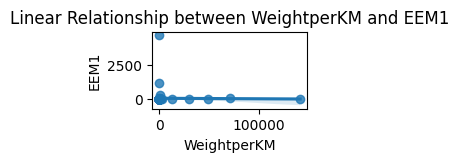

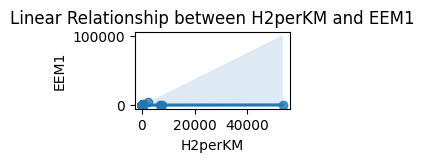

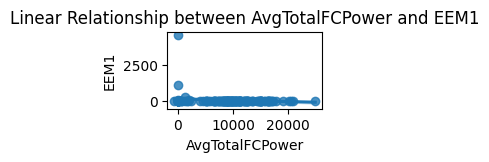

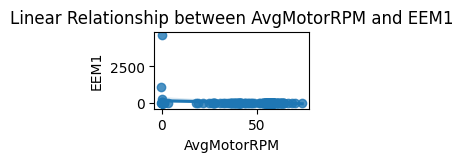

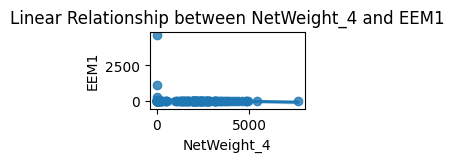

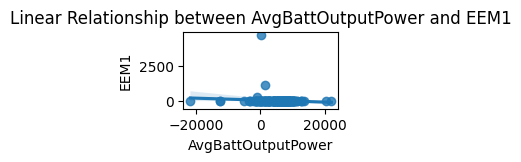

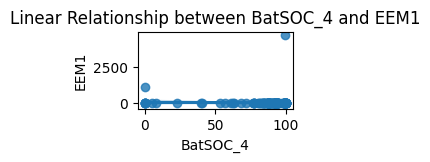

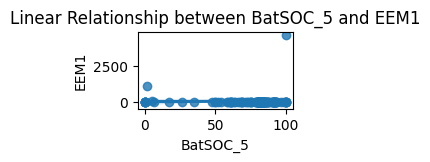

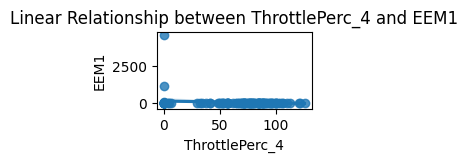

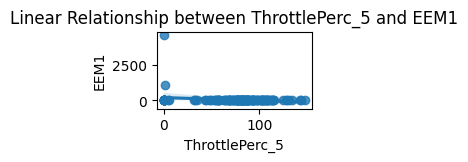

Plotting the linear relationship between AvgThrottlePerc and EEM...


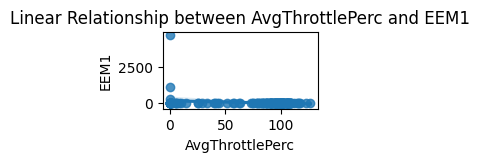

Plotting the linear relationship between AvgMotorPowerDraw Load and EEM...


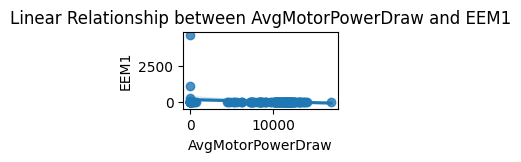

Plotting the linear relationship between AvgMotorTorque and EEM...


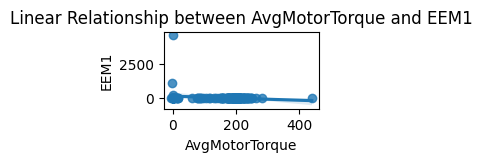

Plotting the linear relationship between WeightperKMand EEM...


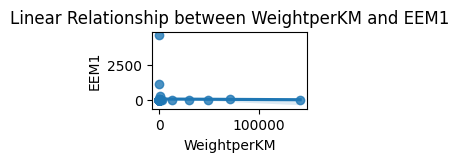

Plotting the linear relationship between MH2perKM and EEM...


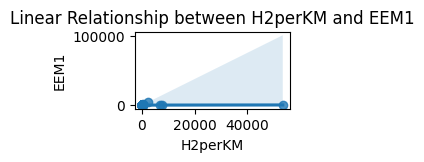

Plotting the linear relationship between AvgMotorRPMand EEM...


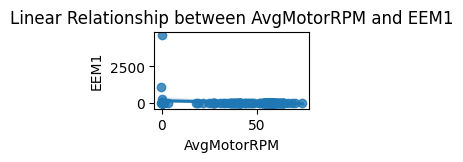

Plotting the linear relationship between NetWeight_4 and EEM..


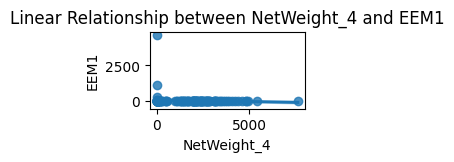

Plotting the linear relationship between AvgBattOutputPower and EEM...


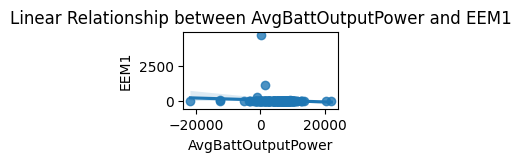

Plotting the linear relationship between BatSOC_3 and EEM...


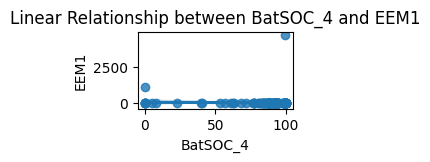

Plotting the linear relationship between BatSOC_5 and EEM...


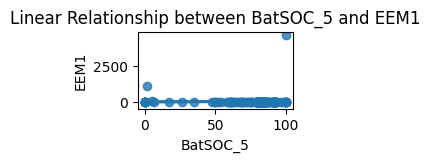

Plotting the linear relationship between ThrottlePerc_4 and EEM...


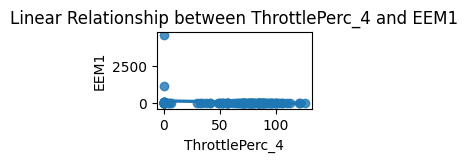

Plotting the linear relationship between ThrottlePerc_5 and EEM...


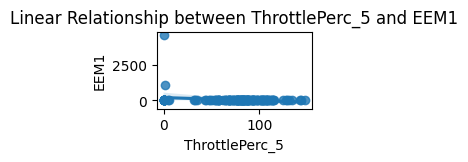

In [12]:

#check linear relationship with target variable EEM for a sample selection of features

def plot_linear_relationships(df, x_col, y_col, figsize=(2, 1)):
    """
    Plot the linear relationship between two columns from a DataFrame.
    
    - x_col: The name of the column to use as the x-axis.
    - y_col: The name of the column to use as the y-axis.
    - figsize: Tuple representing the figure size.
    """
    plt.figure(figsize=figsize)
    sns.regplot(x=x_col, y=y_col, data=df)
    plt.title(f'Linear Relationship between {x_col} and {y_col}')
    plt.show()

plot_linear_relationships(df, 'AvgThrottlePerc','EEM1')
plot_linear_relationships(df, 'AvgMotorPowerDraw','EEM1')
plot_linear_relationships(df, 'AvgMotorTorque','EEM1')
plot_linear_relationships(df, 'WeightperKM','EEM1')
plot_linear_relationships(df, 'H2perKM','EEM1')
plot_linear_relationships(df, 'AvgTotalFCPower','EEM1')
plot_linear_relationships(df, 'AvgMotorRPM','EEM1')
plot_linear_relationships(df, 'NetWeight_4','EEM1')
plot_linear_relationships(df, 'AvgBattOutputPower','EEM1')
plot_linear_relationships(df, 'BatSOC_4','EEM1')
plot_linear_relationships(df, 'BatSOC_5','EEM1')
plot_linear_relationships(df, 'ThrottlePerc_4','EEM1')
plot_linear_relationships(df, 'ThrottlePerc_5','EEM1')

print("Plotting the linear relationship between AvgThrottlePerc and EEM...")
plot_linear_relationships(df, 'AvgThrottlePerc', 'EEM1')

print("Plotting the linear relationship between AvgMotorPowerDraw Load and EEM...")
plot_linear_relationships(df, 'AvgMotorPowerDraw', 'EEM1')

print("Plotting the linear relationship between AvgMotorTorque and EEM...")
plot_linear_relationships(df, 'AvgMotorTorque', 'EEM1')

print("Plotting the linear relationship between WeightperKMand EEM...")
plot_linear_relationships(df, 'WeightperKM', 'EEM1')

print("Plotting the linear relationship between MH2perKM and EEM...")
plot_linear_relationships(df, 'H2perKM', 'EEM1')

print("Plotting the linear relationship between AvgMotorRPMand EEM...")
plot_linear_relationships(df, 'AvgMotorRPM', 'EEM1')

print("Plotting the linear relationship between NetWeight_4 and EEM..")
plot_linear_relationships(df, 'NetWeight_4', 'EEM1')

print("Plotting the linear relationship between AvgBattOutputPower and EEM...")
plot_linear_relationships(df, 'AvgBattOutputPower', 'EEM1')

print("Plotting the linear relationship between BatSOC_3 and EEM...")
plot_linear_relationships(df, 'BatSOC_4', 'EEM1')

print("Plotting the linear relationship between BatSOC_5 and EEM...")
plot_linear_relationships(df, 'BatSOC_5', 'EEM1')


print("Plotting the linear relationship between ThrottlePerc_4 and EEM...")
plot_linear_relationships(df, 'ThrottlePerc_4', 'EEM1')

print("Plotting the linear relationship between ThrottlePerc_5 and EEM...")
plot_linear_relationships(df, 'ThrottlePerc_5', 'EEM1')


#Conclusion, none of the above features shows a strong linear relation with thetarget variable EEM and will be kept


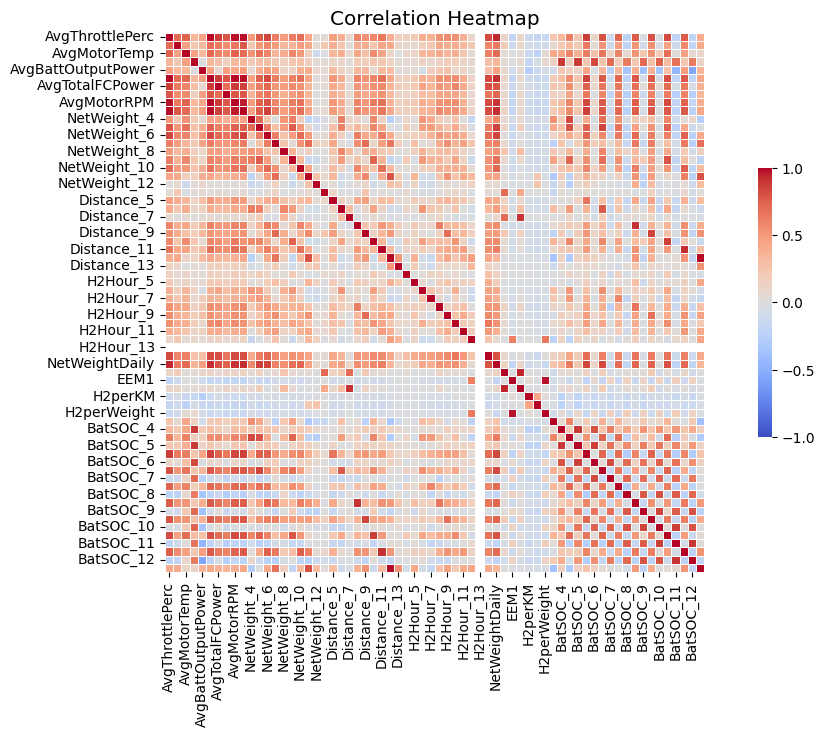


Sorted list of correlations (excluding self and duplicate pairs):
               Variable1        Variable2  Correlation
328   AvgBattOutputPower        BatSOC_12    -0.556825
326   AvgBattOutputPower        BatSOC_11    -0.467819
322   AvgBattOutputPower         BatSOC_9    -0.379406
3167      AvgWeatherTemp  ThrottlePerc_12    -0.375787
320   AvgBattOutputPower         BatSOC_8    -0.350716
...                  ...              ...          ...
3734            BatSOC_8        H2Hour_13          NaN
3866            BatSOC_9        H2Hour_13          NaN
3998           BatSOC_10        H2Hour_13          NaN
4130           BatSOC_11        H2Hour_13          NaN
4262           BatSOC_12        H2Hour_13          NaN

[2145 rows x 3 columns]


In [13]:
#Heatmap to check if variables with high correlation  can be dropped
floats = df.select_dtypes(include="float64")
df1 = floats.corr()

# Set up the heatmap figure size
plt.figure(figsize=(14, 7))

# Customize the heatmap using seaborn's heatmap function without annotations
heatmap = sns.heatmap(
    df1,
    cmap="coolwarm",
    vmin=-1, vmax=1,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5},
)

# Rotate y-axis labels for better readability
plt.yticks(rotation=0)

# Set font scale for better readability
sns.set(font_scale=1.2)

# Add a title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

# Extract and sort the correlations
corr_pairs = df1.unstack().reset_index()
corr_pairs.columns = ['Variable1', 'Variable2', 'Correlation']
# Remove self correlations
corr_pairs = corr_pairs[corr_pairs['Variable1'] != corr_pairs['Variable2']]
# Remove duplicate pairs (i.e., keep one of (A, B) and (B, A))
corr_pairs = corr_pairs[corr_pairs['Variable1'] < corr_pairs['Variable2']]
# Sort by correlation
sorted_corr_pairs = corr_pairs.sort_values(by='Correlation', ascending=True)

# Print the sorted list of correlations
print("\nSorted list of correlations (excluding self and duplicate pairs):")
print(sorted_corr_pairs)

In [337]:
#check for other features with possible high correlation

import pandas as pd


# Calculate the correlation between 'AvgBattOutputPower' and 'AvgBattOutputPower'
correlation1 = df['AvgBattOutputPower'].corr(df['AvgBattOutputPower'])

# Calculate the correlation between 'AvgBattOutputPower' and 'MAvgMotorPowerDraw'
correlation2= df['AvgBattOutputPower'].corr(df['AvgMotorPowerDraw'])

# Calculate the correlation between 'AvgTotalPowerDraw' and 'NetWeightDaily'
correlation3= df['AvgTotalPowerDraw'].corr(df['NetWeightDaily'])

# Calculate the correlation between 'TotalDistanceKM' and 'H2Daily'
correlation4= df['TotalDistanceKM'].corr(df['H2Daily'])

# Calculate the correlation between 'TotalDistanceKM' and 'H2Daily'
correlation5= df['BatSOC_5'].corr(df['H2Daily'])

# Calculate the correlation between 'TotalDistanceKM' and 'H2Daily'
correlation6= df['ThrottlePerc_5'].corr(df['H2Daily'])
# Print the correlation value
print("Correlation between AvgBattOutputPower and AvgBattOutputPower:", correlation1)
print("Correlation between AvgBattOutputPower and MAvgMotorPowerDraw:", correlation2)
print("Correlation between AvgTotalPowerDraw' and 'NetWeightDaily:", correlation3)
print("Correlation between TotalDistanceKM' and 'H2Daily:", correlation4)
print("Correlation between BatSOC_5' and 'H2Daily:", correlation5)
print("Correlation between ThrottlePerc_5' and 'H2Daily:", correlation6)




Correlation between AvgBattOutputPower and AvgBattOutputPower: 1.0
Correlation between AvgBattOutputPower and MAvgMotorPowerDraw: 0.4650097312470187
Correlation between AvgTotalPowerDraw' and 'NetWeightDaily: 0.7335899601595635
Correlation between TotalDistanceKM' and 'H2Daily: 0.08151004776237905
Correlation between BatSOC_5' and 'H2Daily: 0.17543698539409916
Correlation between ThrottlePerc_5' and 'H2Daily: 0.6913519085278582


In [14]:
#Joecode, check number of NANs before splitting train and test set
import pandas as pd


# Count the number of NaNs in each column
nan_counts_df = df.isna().sum()

# Filter the columns with NaNs
nan_counts_with_nans = nan_counts_df[nan_counts_df > 0]

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Print the count of NaNs for each column that has NaNs
print(nan_counts_with_nans)


AvgBattOutputPower     3
AvgTotalFCPower        1
EEM1                  38
EEM2                  35
H2perKM                1
WeightperKM            1
H2perWeight           38
BatSOC_4              26
ThrottlePerc_4        26
BatSOC_5              20
ThrottlePerc_5        20
BatSOC_6              18
ThrottlePerc_6        18
BatSOC_7              15
ThrottlePerc_7        15
BatSOC_8              13
ThrottlePerc_8        13
BatSOC_9              11
ThrottlePerc_9        11
BatSOC_10             15
ThrottlePerc_10       15
BatSOC_11             16
ThrottlePerc_11       16
BatSOC_12             15
ThrottlePerc_12       15
dtype: int64


In [15]:
#JoeCode , replace NANS 



# Fill  with the last known value
columns_last_known = ['H2perWeight']
df[columns_last_known] = df[columns_last_known].fillna(method='ffill')

# Fill with average of previous last known and preceding first known values
def fill_with_avg(df, column):
    # Get the series where NaNs are located
    nan_indices = df[column].isna()
    
    # Calculate rolling average before and after NaN values
    forward_fill = df[column].fillna(method='ffill')
    backward_fill = df[column].fillna(method='bfill')
    
    # Calculate average of forward and backward fill values
    df[column] = np.where(nan_indices, (forward_fill + backward_fill) / 2, df[column])

columns_avg = ['H2perKM', 'AvgBattOutputPower', 'AvgTotalFCPower', 'WeightperKM', 'BatSOC_4', 'ThrottlePerc_4', 'BatSOC_5', 'ThrottlePerc_5', 'BatSOC_6', 'ThrottlePerc_6', 'BatSOC_7', 'ThrottlePerc_7',
                'BatSOC_8', 'ThrottlePerc_8', 'BatSOC_9', 'ThrottlePerc_9', 'BatSOC_10', 'ThrottlePerc_10', 'BatSOC_11', 'ThrottlePerc_11', 'BatSOC_12', 'ThrottlePerc_12']
for column in columns_avg:
    fill_with_avg(df, column)

# Drop all other rows containing NaNs
df.dropna(inplace=True)

# Print the updated DataFrame to verify changes
print(df)


           date  DayOfWeek  AvgThrottlePerc  AvgBrakePerc  AvgMotorTemp  \
0    2022-08-01     Monday        96.154244      4.550855     62.985561   
1    2022-08-02    Tuesday       103.810700      4.409901     67.736914   
2    2022-08-03  Wednesday        84.076417      3.963729     65.247415   
3    2022-08-04   Thursday        94.717933      3.792878     66.646993   
4    2022-08-05     Friday        89.798072      2.879073     64.052956   
..          ...        ...              ...           ...           ...   
192  2023-07-20   Thursday       105.018565      6.320770     69.919892   
193  2023-07-21     Friday       100.044717      6.577408     65.586861   
194  2023-07-24     Monday        90.254516      6.510147     62.728650   
195  2023-07-25    Tuesday        98.814611      6.522829     65.721530   
199  2023-07-31     Monday        94.891196      9.365860     62.110089   

       Avg24VBatt  AvgBattOutputPower  AvgMotorPowerDraw  AvgTotalFCPower  \
0    27469.011339     

/tmp/ipykernel_36603/1072095710.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[columns_last_known] = df[columns_last_known].fillna(method='ffill')
/tmp/ipykernel_36603/1072095710.py:15: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  forward_fill = df[column].fillna(method='ffill')
/tmp/ipykernel_36603/1072095710.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  backward_fill = df[column].fillna(method='bfill')


In [16]:
#JoeCode remove the rows with NANs that has NANS in target EMM2 and EMM2
df.dropna(subset=['EEM1', 'EEM2'])

,date,DayOfWeek,AvgThrottlePerc,AvgBrakePerc,AvgMotorTemp,Avg24VBatt,AvgBattOutputPower,AvgMotorPowerDraw,AvgTotalFCPower,AvgTotalPowerDraw,AvgMotorRPM,AvgMotorTorque,NetWeight_4,NetWeight_5,NetWeight_6,NetWeight_7,NetWeight_8,NetWeight_9,NetWeight_10,NetWeight_11,NetWeight_12,Distance_4,Distance_5,Distance_6,Distance_7,Distance_8,Distance_9,Distance_10,Distance_11,Distance_12,Distance_13,H2Hour_4,H2Hour_5,H2Hour_6,H2Hour_7,H2Hour_8,H2Hour_9,H2Hour_10,H2Hour_11,H2Hour_12,H2Hour_13,H2Daily,NetWeightDaily,TotalDistanceKM,EEM1,EEM2,H2perKM,WeightperKM,H2perWeight,AvgWeatherTemp,Is_Friday,Is_Monday,Is_Thursday,Is_Tuesday,Is_Wednesday,BatSOC_4,ThrottlePerc_4,BatSOC_5,ThrottlePerc_5,BatSOC_6,ThrottlePerc_6,BatSOC_7,ThrottlePerc_7,BatSOC_8,ThrottlePerc_8,BatSOC_9,ThrottlePerc_9,BatSOC_10,ThrottlePerc_10,BatSOC_11,ThrottlePerc_11,BatSOC_12,ThrottlePerc_12
0,2022-08-01,Monday,96.154244,4.550855,62.985561,27469.011339,9851.671079,11945.666054,8703.830764,14305.731671,58.763331,206.924819,2280.747137,3601.083333,3100.750000,654.833333,472.933333,3512.016667,2725.533333,500.850000,55.333333,5.344842,2.441296,6.556771,31.981089,5.157300,0.978467,15.831868,22.404232,0.240586,0.0,0.0,0.0,0.0,1673.0,1651.0,1802.0,0.0,0.0,0.0,0.0,5126.0,16904.080471,90.936451,0.003335,299.882381,56.369035,185.888940,0.303240,20.6,0,1,0,0,0,88.740785,95.396979,81.852778,68.163701,54.058040,98.033377,46.212766,212.209783,24.638125,47.125000,59.353271,32.311446,60.604521,156.957886,26.632145,168.831120,28.668194,1.274654
1,2022-08-02,Tuesday,103.810700,4.409901,67.736914,27348.589110,1419.682794,12684.985133,17103.906737,15623.545252,64.187143,204.140830,482.150000,2684.516667,4360.850000,1368.500000,531.816667,2449.483333,2449.000000,489.766667,24.283333,6.534194,8.223727,2.496873,1.484345,39.214317,5.611346,19.847941,16.820958,0.048788,0.0,24.0,306.0,1024.0,508.0,2055.0,1135.0,2549.0,1844.0,0.0,0.0,9445.0,14840.366667,100.282489,0.006346,157.567910,94.183941,147.985623,0.636440,21.5,0,0,0,1,0,39.566543,52.065138,83.520842,131.485685,80.172292,92.770475,44.506452,44.192623,71.162760,215.261237,63.706730,127.942992,70.174210,184.256509,48.978542,82.959444,80.961111,0.000000
2,2022-08-03,Wednesday,84.076417,3.963729,65.247415,27338.805697,949.707554,10789.367357,14826.676794,12730.509983,56.721119,181.837248,2633.333333,3099.733333,2127.033333,1514.450000,585.033333,4108.216667,1102.566667,304.000000,0.000000,4.566503,2.749421,2.401625,7.688783,34.895879,3.354465,22.954519,9.522599,0.092700,0.0,0.0,0.0,729.0,1148.0,2194.0,1420.0,1352.0,1342.0,0.0,0.0,8185.0,15474.366667,88.226494,0.005995,166.798916,92.772585,175.393647,0.528939,25.5,0,0,0,0,1,77.491181,64.288338,68.819306,62.236724,63.193879,70.108127,40.142236,79.549876,64.322082,196.675974,76.491111,89.888611,63.292349,136.167923,67.245355,63.142427,84.168333,0.000000
3,2022-08-04,Thursday,94.717933,3.792878,66.646993,27276.035623,3248.896387,11908.918308,15044.350989,14046.182042,59.917634,187.057854,2316.083333,2451.366667,4652.766667,743.433333,2086.716667,4488.166667,272.833333,448.166667,7.383333,5.127555,2.866547,4.397478,31.310260,8.295285,2.270954,12.387934,26.975626,0.043984,0.0,0.0,0.0,1044.0,2181.0,1680.0,621.0,621.0,2154.0,0.0,0.0,8301.0,17466.916667,93.675623,0.005073,197.111709,88.614303,186.461709,0.475241,25.9,0,0,1,0,0,92.588969,75.057180,49.500607,50.535837,75.557630,87.570406,61.360278,163.367500,75.784583,102.282500,49.947847,65.188333,29.446785,112.510531,62.946181,195.065000,70.780417,0.000000
4,2022-08-05,Friday,89.798072,2.879073,64.052956,27543.454952,-299.587139,11117.024355,14714.915635,12619.090758,59.974876,177.726531,957.666667,3205.166667,3233.233333,1071.416667,847.583333,5765.966667,1818.533333,154.750000,0.000000,6.129699,3.415388,4.405980,36.646752,4.101552,3.989209,31.744742,3.728018,0.501942,0.0,0.0,0.0,1021.0,2565.0,819.0,1070.0,2470.0,419.0,0.0,0.0,8364.0,17054.316667,94.663282,0.005181,193.019798,88.355271,180.157673,0.490433,18.9,1,0,0,0,0,53.312315,72.510682,85.672292,7

In [17]:
##Joecode, check number of NANs before splitting train and test set
# Check NaN counts for 'EEM1 and EEM2' column 
nan_counts_eem1_eem2 = df[['EEM1', 'EEM2']].isna().sum()
print(f"NaN counts in 'EEM1/EEM2': {nan_counts_eem1_eem2}")



NaN counts in 'EEM1/EEM2': EEM1    0
EEM2    0
dtype: int64


In [18]:
#Select the varaibles to inlcude in the test and trainset X set and separate the target y for test and train
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Drop all features containing original features related with target valies
#Target variable: Since EEM= MAX(H2Daily) / (MAX(NetWeightDaily) * MAX(TotalDistanceKM)) AS EEM is the target ,we need to drop all tehese features used to construct EEM
#Target variable: Since  EEM2=(MAX(NetWeightDaily) * MAX(TotalDistanceKM)) / MAX(H2Daily) AS EEM2, is the target ,we need to drop all tehese features used to construct EEM

X = df.drop(['EEM1','EEM2', 'H2Daily', 'NetWeightDaily', 'TotalDistanceKM','WeightperKM','NetWeightDaily','H2perWeight','H2perKM'], axis=1)  # Veronderstel dat deze kolommen zijn verwijderd
y1 = df['EEM1']
y2 = df['EEM2']

# Normaliseer de data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

In [19]:
print("Columns of X:")
print(X.columns)


Columns of X:
Index(['date', 'DayOfWeek', 'AvgThrottlePerc', 'AvgBrakePerc', 'AvgMotorTemp',
       'Avg24VBatt', 'AvgBattOutputPower', 'AvgMotorPowerDraw',
       'AvgTotalFCPower', 'AvgTotalPowerDraw', 'AvgMotorRPM', 'AvgMotorTorque',
       'NetWeight_4', 'NetWeight_5', 'NetWeight_6', 'NetWeight_7',
       'NetWeight_8', 'NetWeight_9', 'NetWeight_10', 'NetWeight_11',
       'NetWeight_12', 'Distance_4', 'Distance_5', 'Distance_6', 'Distance_7',
       'Distance_8', 'Distance_9', 'Distance_10', 'Distance_11', 'Distance_12',
       'Distance_13', 'H2Hour_4', 'H2Hour_5', 'H2Hour_6', 'H2Hour_7',
       'H2Hour_8', 'H2Hour_9', 'H2Hour_10', 'H2Hour_11', 'H2Hour_12',
       'H2Hour_13', 'AvgWeatherTemp', 'Is_Friday', 'Is_Monday', 'Is_Thursday',
       'Is_Tuesday', 'Is_Wednesday', 'BatSOC_4', 'ThrottlePerc_4', 'BatSOC_5',
       'ThrottlePerc_5', 'BatSOC_6', 'ThrottlePerc_6', 'BatSOC_7',
       'ThrottlePerc_7', 'BatSOC_8', 'ThrottlePerc_8', 'BatSOC_9',
       'ThrottlePerc_9', 'BatSOC_10'

In [20]:
# Splits de data for EEM1
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, y1,y2, test_size=0.2, random_state=42) 

#Print the number of rows in X_train and X_test
print("Number of rows in X_train:", X_train.shape[0])
print("Number of rows in X_test:", X_test.shape[0])
print("Number of rows in y1_train:", y1_train.shape[0])
print("Number of rows in y1_test:", y1_test.shape[0])
print("Number of rows in y2_train:", y2_train.shape[0])
print("Number of rows in y2_test:", y2_test.shape[0])

Number of rows in X_train: 118
Number of rows in X_test: 30
Number of rows in y1_train: 118
Number of rows in y1_test: 30
Number of rows in y2_train: 118
Number of rows in y2_test: 30


In [21]:

print("Number of rows in y1", y1.shape[0])
print("Number of rows in y2", y2.shape[0])
print("Number of rows in X", X.shape[0])

Number of rows in y1 148
Number of rows in y2 148
Number of rows in X 148


In [22]:
#Check for NANs i target
nan_counts_y_train1 = y1_train.isna().sum()
print(nan_counts_y_train1)
nan_counts_y_train2 = y2_train.isna().sum()
print(nan_counts_y_train2)

0
0


In [ ]:
raise SystemExit("Stopping execution of preprocessing  at this cell.")


END OF PREPROCESSING

START OLS REGRESSION AND LINEAR REGRESSION

In [23]:
# train  OLS ordinary least squares regression

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import numpy as np



# Ensure all features are numeric
X_train = X_train.select_dtypes(include=[np.number])
X_test = X_test.select_dtypes(include=[np.number])

# Step 1: Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames to retain column names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Step 2: Fitting the OLS model for EEM1
X_train_scaled_with_const1 = sm.add_constant(X_train_scaled_df)
model1 = sm.OLS(y1_train, X_train_scaled_with_const1).fit()

# Step 2: Fitting the OLS model for EEM2
X_train_scaled_with_const2 = sm.add_constant(X_train_scaled_df)
model2 = sm.OLS(y2_train, X_train_scaled_with_const2).fit()

# Step 3: Testing the model for EEM1
X_test_scaled_with_const1 = sm.add_constant(X_test_scaled_df)
y1_pred = model1.predict(X_test_scaled_with_const1)
mse1 = mean_squared_error(y1_test, y1_pred)

# Step 3: Testing the model for EEM2
X_test_scaled_with_const2 = sm.add_constant(X_test_scaled_df)
y2_pred = model2.predict(X_test_scaled_with_const2)
mse2 = mean_squared_error(y2_test, y2_pred)

# Display the results for EEM1
print(model1.summary())
print("Mean Squared Error EEM1 on Test Set:", mse1)

# Display the results for EEM2
print(model2.summary())
print("Mean Squared Error EEM2 on Test Set:", mse2)


                            OLS Regression Results                            
Dep. Variable:                   EEM1   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     5.049
Date:                Wed, 29 May 2024   Prob (F-statistic):           3.22e-09
Time:                        13:14:38   Log-Likelihood:                -771.17
No. Observations:                 118   AIC:                             1666.
Df Residuals:                      56   BIC:                             1838.
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 40.0344     22

In [24]:
#Check num of rows , colums and type in the X_Scaled set and y set
print(X_train_scaled.shape)
print(type(X_train_scaled))
print(y1.shape)
print(type(y1))
print(y2.shape)
print(type(y2))

(118, 63)
<class 'numpy.ndarray'>
(148,)
<class 'pandas.core.series.Series'>
(148,)
<class 'pandas.core.series.Series'>


In [25]:
#check which format the dataset is
print("Type of df for X:",type(X_train_scaled))
print("Type of df for y1:",type(y1))
print("Type of df for y2:",type(y2))

Type of df for X: <class 'numpy.ndarray'>
Type of df for y1: <class 'pandas.core.series.Series'>
Type of df for y2: <class 'pandas.core.series.Series'>


In [28]:
# train a linear regression model, use the scaled trainingset X_scaled for EEM1
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Fit on training data and transform both X_train and X_test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Train the model for EEM1
model = LinearRegression()
model.fit(X_train_scaled, y1_train)

# Step 3: Make predictions for EEM1
y1_pred = model.predict(X_test_scaled)

# Step 4: Evaluate the model for EEM1
mse1 = mean_squared_error(y1_test, y1_pred)
mae1 = mean_absolute_error(y1_test, y1_pred)
r21 = r2_score(y1_test, y1_pred)

print(f"Mean Squared Error (MSE) for EEM1: {mse1}")
print(f"Mean Absolut Error (MAE) for EEM1: {mse1}")
print(f"Coefficient of Determination (R^2) for EEM1: {r21}")

# Get the feature names
feature_names = X_train.columns

# Get the coefficients from the model
coefficients = model.coef_

# Pair each feature name with its corresponding coefficient
feature_coefficients = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Filter coefficients with absolute value greater than 0.05
significant_coefficients = feature_coefficients[feature_coefficients['Coefficient'].abs() > 0.05]

# Sort the features by the absolute value of their coefficients in descending order
feature_coefficients_sorted = significant_coefficients.reindex(feature_coefficients.Coefficient.abs().sort_values(ascending=False).index)

# Print the feature names alongside their coefficients
print("Feature Coefficients in Descending Order for EEM1:")
print(feature_coefficients_sorted)

Mean Squared Error (MSE) for EEM1: 113946.09983985499
Mean Absolut Error (MAE) for EEM1: 113946.09983985499
Coefficient of Determination (R^2) for EEM1: -1.722215600646892
Feature Coefficients in Descending Order for EEM1:
              Feature  Coefficient
0     AvgThrottlePerc   461.929625
37          H2Hour_12   448.304501
27        Distance_12  -374.550387
7   AvgTotalPowerDraw   334.051985
59          BatSOC_11   310.817285
..                ...          ...
30           H2Hour_5     7.417926
49           BatSOC_6     5.548155
17       NetWeight_11    -5.164720
12        NetWeight_6     2.042405
38                NaN          NaN

[63 rows x 2 columns]


In [352]:
# train a linear regression model, use the scaled trainingset X_scaled for EEM2
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Fit on training data and transform both X_train and X_test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Train the model for EEM2
model = LinearRegression()
model.fit(X_train_scaled, y2_train)

# Step 3: Make predictions for EEM2
y2_pred = model.predict(X_test_scaled)

# Step 4: Evaluate the model for EEM2
mse2 = mean_squared_error(y2_test, y2_pred)
r22 = r2_score(y2_test, y2_pred)

print(f"Mean Squared Error (MSE) for EEM2: {mse2}")
print(f"Coefficient of Determination (R^2) for EEM2: {r22}")

# Get the feature names
feature_names = X_train.columns

# Get the coefficients from the model
coefficients = model.coef_

# Pair each feature name with its corresponding coefficient
feature_coefficients = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Filter coefficients with absolute value greater than 0.05
significant_coefficients = feature_coefficients[feature_coefficients['Coefficient'].abs() > 0.05]

# Sort the features by the absolute value of their coefficients in descending order
feature_coefficients_sorted = significant_coefficients.reindex(feature_coefficients.Coefficient.abs().sort_values(ascending=False).index)

# Print the feature names alongside their coefficients
print("Feature Coefficients in Descending Order for EEM2:")
print(feature_coefficients_sorted)


Mean Squared Error (MSE) for EEM2: 8053.10180407336
Coefficient of Determination (R^2) for EEM2: 0.5871829365840868
Feature Coefficients in Descending Order for EEM2:
              Feature  Coefficient
22         Distance_7  4139.435485
19         Distance_4  1962.158922
7   AvgTotalPowerDraw   -71.947532
0     AvgThrottlePerc    70.439111
23         Distance_8    55.114863
..                ...          ...
45           BatSOC_4     1.061963
42        Is_Thursday     0.830829
50     ThrottlePerc_6    -0.764741
57                NaN          NaN
38                NaN          NaN

[63 rows x 2 columns]


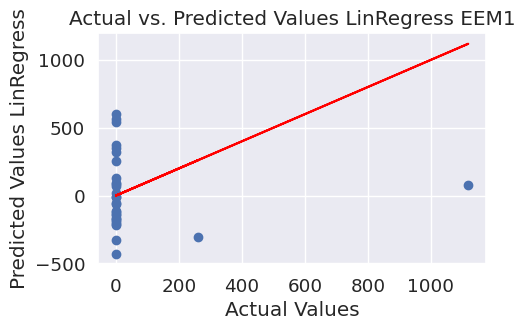

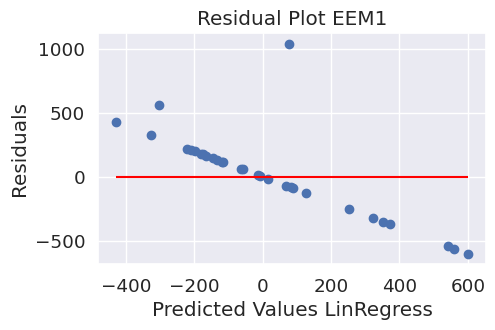

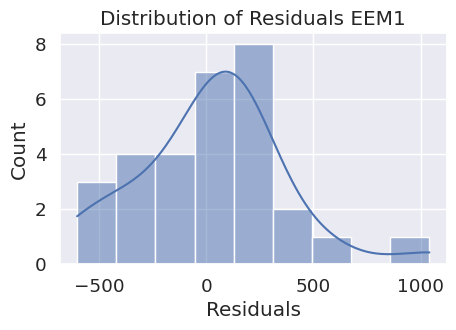

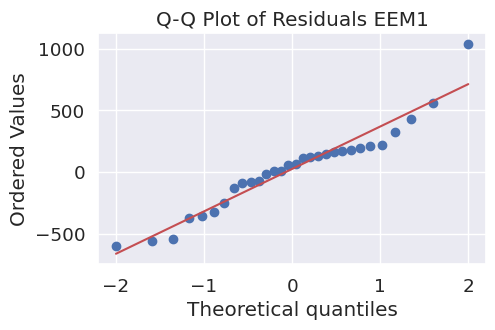

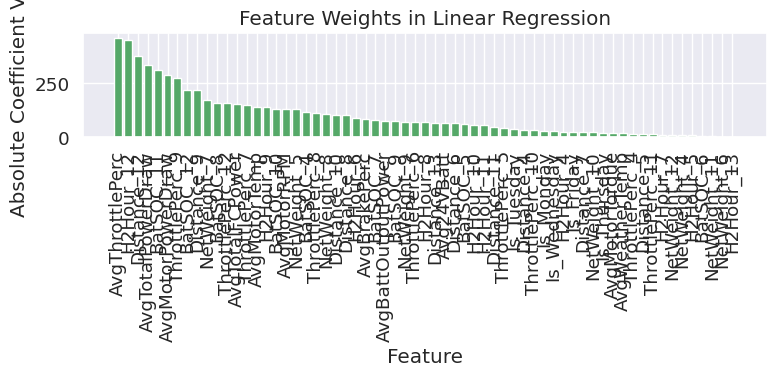

In [29]:
# residuals, predict vs actuals, qq plots for LinearRegression EEM1
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression



# Training a Linear Regression model
model1 = LinearRegression()
model1.fit(X_train_scaled, y1_train)

# Predicting values for the testing set
y1_pred = model1.predict(X_test_scaled)

# Plotting Actual vs. Predicted Values
plt.figure(figsize=(5, 3))
plt.scatter(y1_test, y1_pred)
plt.plot(y1_test, y1_test, color='red')  # Ideal line where predicted values equal actual values
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values LinRegress')
plt.title('Actual vs. Predicted Values LinRegress EEM1')
plt.show()

# Calculating residuals
residuals = y1_test - y1_pred

# Plotting Residuals
plt.figure(figsize=(5, 3))
plt.scatter(y1_pred, residuals)
plt.hlines(y=0, xmin=y1_pred.min(), xmax=y1_pred.max(), color='red')
plt.xlabel('Predicted Values LinRegress')
plt.ylabel('Residuals')
plt.title('Residual Plot EEM1')
plt.show()

# Distribution of Residuals
plt.figure(figsize=(5, 3))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals EEM1')
plt.show()

# Q-Q Plot of Residuals
plt.figure(figsize=(5, 3))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals EEM1')
plt.show()

# Assuming 'model' is your trained LinearRegression instance and 'X_train' is your feature DataFrame
coefficients = model1.coef_

# Getting absolute values of coefficients to somewhat mimic "importance"
absolute_coefficients = np.abs(coefficients)

# Sorting indices of coefficients by their absolute values in descending order
indices = np.argsort(absolute_coefficients)[::-1]

# Plotting the coefficients (mimicking feature importances)
plt.figure(figsize=(8, 4))
sorted_feature_names = np.array(X_train.columns)[indices]
plt.title('Feature Weights in Linear Regression')
plt.bar(range(X_train.shape[1]), absolute_coefficients[indices], color='g', align='center')
plt.xticks(range(X_train.shape[1]), sorted_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()



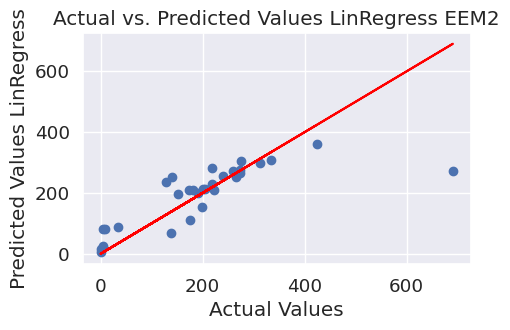

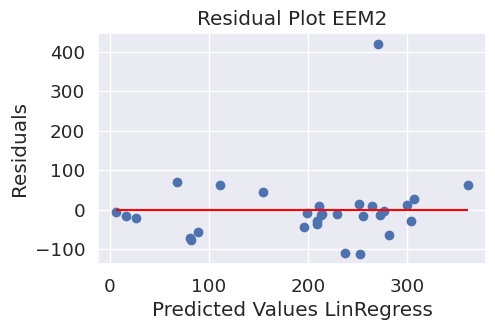

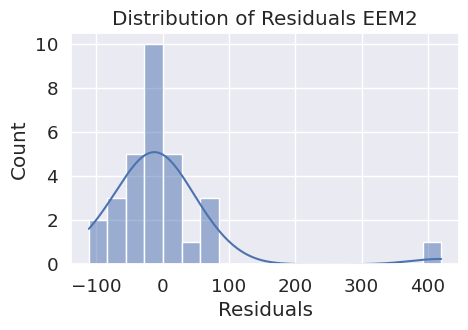

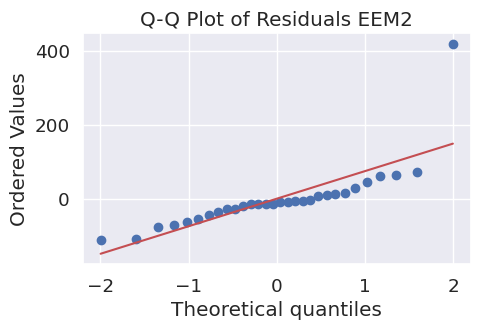

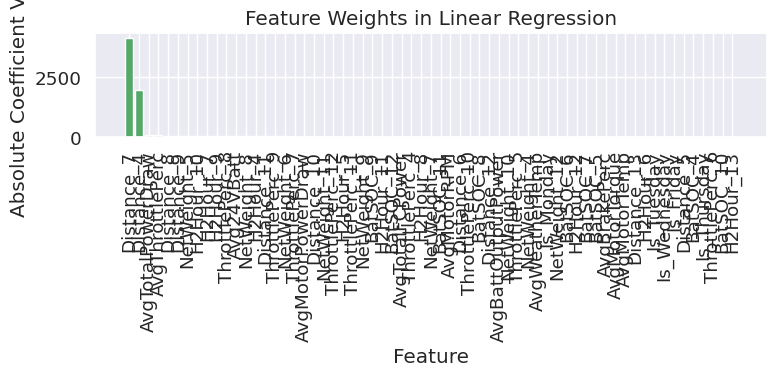

In [354]:
# residuals, predict vs actuals, qq plots for LinearRegression for EEM2
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression



# Training a Linear Regression model
model2 = LinearRegression()
model2.fit(X_train_scaled, y2_train)

# Predicting values for the testing set
y2_pred = model.predict(X_test_scaled)

# Plotting Actual vs. Predicted Values
plt.figure(figsize=(5, 3))
plt.scatter(y2_test, y2_pred)
plt.plot(y2_test, y2_test, color='red')  # Ideal line where predicted values equal actual values
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values LinRegress')
plt.title('Actual vs. Predicted Values LinRegress EEM2')
plt.show()

# Calculating residuals
residuals = y2_test - y2_pred

# Plotting Residuals
plt.figure(figsize=(5, 3))
plt.scatter(y2_pred, residuals)
plt.hlines(y=0, xmin=y2_pred.min(), xmax=y2_pred.max(), color='red')
plt.xlabel('Predicted Values LinRegress')
plt.ylabel('Residuals')
plt.title('Residual Plot EEM2')
plt.show()

# Distribution of Residuals
plt.figure(figsize=(5, 3))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals EEM2')
plt.show()

# Q-Q Plot of Residuals
plt.figure(figsize=(5, 3))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals EEM2')
plt.show()

# Assuming 'model' is your trained LinearRegression instance and 'X_train' is your feature DataFrame
coefficients = model2.coef_

# Getting absolute values of coefficients to somewhat mimic "importance"
absolute_coefficients = np.abs(coefficients)

# Sorting indices of coefficients by their absolute values in descending order
indices = np.argsort(absolute_coefficients)[::-1]

# Plotting the coefficients (mimicking feature importances)
plt.figure(figsize=(8, 4))
sorted_feature_names = np.array(X_train.columns)[indices]
plt.title('Feature Weights in Linear Regression')
plt.bar(range(X_train.shape[1]), absolute_coefficients[indices], color='g', align='center')
plt.xticks(range(X_train.shape[1]), sorted_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()

In [355]:
raise SystemExit("Stopping execution of OLS and Linear regression at this cell.")


SystemExit: Stopping execution of OLS and Linear regression at this cell.

/home/joelva/.pyenv/versions/3.11.5/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3556: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


END OF OLS REGRESSION AND LINEAR REGRESSION

LASSO REGRESSION

In [31]:
#Lasso regression on EEM1 (print only Coefficients with weight >0.05)
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Fit on training data and transform both X_train and X_test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Train the Lasso regression model for EEM2
alpha = 10  # You can tune this parameter
model = Lasso(alpha=alpha)
model.fit(X_train_scaled, y1_train)

# Step 3: Make predictions for EEM2
y1_pred = model.predict(X_test_scaled)

# Step 4: Evaluate the model for EEM2
mse1 = mean_squared_error(y1_test, y1_pred)
mae1 = mean_absolute_error(y1_test, y1_pred)
r21 = r2_score(y1_test, y1_pred)

print(f"Mean Squared Error (MSE) for EEM1: {mse1}")
print(f"Mean Absolute Error (MAE) for EEM1: {mse1}")
print(f"Coefficient of Determination (R^2) for EEM1: {r21}")

# Get the feature names
feature_names = X_train.columns

# Get the coefficients from the model
coefficients = model.coef_

# Pair each feature name with its corresponding coefficient
feature_coefficients = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Filter coefficients with absolute value greater than 0.05
significant_coefficients = feature_coefficients[feature_coefficients['Coefficient'].abs() > 0.05]

# Sort the features by the absolute value of their coefficients in descending order
significant_coefficients_sorted = significant_coefficients.reindex(significant_coefficients.Coefficient.abs().sort_values(ascending=False).index)

# Print the feature names alongside their coefficients
print("Significant Feature Coefficients in Descending Order for EEM1:")
print(significant_coefficients_sorted)

Mean Squared Error (MSE) for EEM1: 70051.36919456226
Mean Absolute Error (MAE) for EEM1: 70051.36919456226
Coefficient of Determination (R^2) for EEM1: -0.6735538147959761
Significant Feature Coefficients in Descending Order for EEM1:
            Feature  Coefficient
37        H2Hour_12   340.253555
27      Distance_12  -115.847618
59        BatSOC_11    95.333800
2      AvgMotorTemp    94.220951
61        BatSOC_12   -57.561488
6   AvgTotalFCPower   -52.334705
28      Distance_13   -45.642659
45         BatSOC_4   -44.272281
57        BatSOC_10    42.201478
39   AvgWeatherTemp   -41.734254
13      NetWeight_7   -39.852899
1      AvgBrakePerc   -34.511558
34         H2Hour_9   -29.030743
41        Is_Monday   -27.881938
31         H2Hour_6    25.031005
51         BatSOC_7    24.374258
35        H2Hour_10   -21.415768
11      NetWeight_5   -19.760120
47         BatSOC_5   -16.736223
52   ThrottlePerc_7   -11.755718
44     Is_Wednesday    11.529457
19       Distance_4    11.095304
60  Th

In [357]:
X.head()

,date,DayOfWeek,AvgThrottlePerc,AvgBrakePerc,AvgMotorTemp,Avg24VBatt,AvgBattOutputPower,AvgMotorPowerDraw,AvgTotalFCPower,AvgTotalPowerDraw,AvgMotorRPM,AvgMotorTorque,NetWeight_4,NetWeight_5,NetWeight_6,NetWeight_7,NetWeight_8,NetWeight_9,NetWeight_10,NetWeight_11,NetWeight_12,Distance_4,Distance_5,Distance_6,Distance_7,Distance_8,Distance_9,Distance_10,Distance_11,Distance_12,Distance_13,H2Hour_4,H2Hour_5,H2Hour_6,H2Hour_7,H2Hour_8,H2Hour_9,H2Hour_10,H2Hour_11,H2Hour_12,H2Hour_13,AvgWeatherTemp,Is_Friday,Is_Monday,Is_Thursday,Is_Tuesday,Is_Wednesday,BatSOC_4,ThrottlePerc_4,BatSOC_5,ThrottlePerc_5,BatSOC_6,ThrottlePerc_6,BatSOC_7,ThrottlePerc_7,BatSOC_8,ThrottlePerc_8,BatSOC_9,ThrottlePerc_9,BatSOC_10,ThrottlePerc_10,BatSOC_11,ThrottlePerc_11,BatSOC_12,ThrottlePerc_12
0,2022-08-01,Monday,96.154244,4.550855,62.985561,27469.011339,9851.671079,11945.666054,8703.830764,14305.731671,58.763331,206.924819,2280.747137,3601.083333,3100.750000,654.833333,472.933333,3512.016667,2725.533333,500.850000,55.333333,5.344842,2.441296,6.556771,31.981089,5.157300,0.978467,15.831868,22.404232,0.240586,0.0,0.0,0.0,0.0,1673.0,1651.0,1802.0,0.0,0.0,0.0,0.0,20.6,0,1,0,0,0,88.740785,95.396979,81.852778,68.163701,54.058040,98.033377,46.212766,212.209783,24.638125,47.125000,59.353271,32.311446,60.604521,156.957886,26.632145,168.831120,28.668194,1.274654
1,2022-08-02,Tuesday,103.810700,4.409901,67.736914,27348.589110,1419.682794,12684.985133,17103.906737,15623.545252,64.187143,204.140830,482.150000,2684.516667,4360.850000,1368.500000,531.816667,2449.483333,2449.000000,489.766667,24.283333,6.534194,8.223727,2.496873,1.484345,39.214317,5.611346,19.847941,16.820958,0.048788,0.0,24.0,306.0,1024.0,508.0,2055.0,1135.0,2549.0,1844.0,0.0,0.0,21.5,0,0,0,1,0,39.566543,52.065138,83.520842,131.485685,80.172292,92.770475,44.506452,44.192623,71.162760,215.261237,63.706730,127.942992,70.174210,184.256509,48.978542,82.959444,80.961111,0.000000
2,2022-08-03,Wednesday,84.076417,3.963729,65.247415,27338.805697,949.707554,10789.367357,14826.676794,12730.509983,56.721119,181.837248,2633.333333,3099.733333,2127.033333,1514.450000,585.033333,4108.216667,1102.566667,304.000000,0.000000,4.566503,2.749421,2.401625,7.688783,34.895879,3.354465,22.954519,9.522599,0.092700,0.0,0.0,0.0,729.0,1148.0,2194.0,1420.0,1352.0,1342.0,0.0,0.0,25.5,0,0,0,0,1,77.491181,64.288338,68.819306,62.236724,63.193879,70.108127,40.142236,79.549876,64.322082,196.675974,76.491111,89.888611,63.292349,136.167923,67.245355,63.142427,84.168333,0.000000
3,2022-08-04,Thursday,94.717933,3.792878,66.646993,27276.035623,3248.896387,11908.918308,15044.350989,14046.182042,59.917634,187.057854,2316.083333,2451.366667,4652.766667,743.433333,2086.716667,4488.166667,272.833333,448.166667,7.383333,5.127555,2.866547,4.397478,31.310260,8.295285,2.270954,12.387934,26.975626,0.043984,0.0,0.0,0.0,1044.0,2181.0,1680.0,621.0,621.0,2154.0,0.0,0.0,25.9,0,0,1,0,0,92.588969,75.057180,49.500607,50.535837,75.557630,87.570406,61.360278,163.367500,75.784583,102.282500,49.947847,65.188333,29.446785,112.510531,62.946181,195.065000,70.780417,0.000000
4,2022-08-05,Friday,89.798072,2.879073,64.052956,27543.454952,-299.587139,11117.024355,14714.915635,12619.090758,59.974876,177.726531,957.666667,3205.166667,3233.233333,1071.416667,847.583333,5765.966667,1818.533333,154.750000,0.000000,6.129699,3.415388,4.405980,36.646752,4.101552,3.989209,31.744742,3.728018,0.501942,0.0,0.0,0.0,1021.0,2565.0,819.0,1070.0,2470.0,419.0,0.0,0.0,18.9,1,0,0,0,0,53.312315,72.510682,85.672292,78.988027,80.778848,110.257544,77.573039,202.349030,45.092005,48.584612,79.941181,79.799762,75.839105,178.671961,59.127500,35.783889,92.488194,0.000000


In [34]:
#Lasso for EEM1 with gridsearch through hyperparameter tuning using cross-validation',  use GridSearchCV from sklearn.model_selection.

import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# Create a scaler object
scaler = StandardScaler()

#Drop the date colom

date_columns = X.select_dtypes(include=['datetime64[ns]', 'datetime64']).columns
print(f"Datetime columns to be dropped: {date_columns}")
X = X.drop(columns=date_columns).select_dtypes(include=[np.number])

# Split the data into training and testing sets
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)

# Fit on training data and transform both X_train and X_test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# Step 2: Define the parameter grid for alpha
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Step 3: Set up the GridSearchCV with Lasso
lasso = Lasso(max_iter=10000)  # Increase the number of iterations
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Step 4: Fit the grid search to the training data
grid_search.fit(X_train_scaled, y1_train)

# Step 5: Get the best estimator
best_lasso = grid_search.best_estimator_

# Step 6: Make predictions for EEM2 with the best model
y1_pred = best_lasso.predict(X_test_scaled)

# Step 7: Evaluate the model for EEM2
mse1 = mean_squared_error(y2_test, y2_pred)
mae1 = mean_absolute_error(y2_test, y2_pred)
r21 = r2_score(y2_test, y2_pred)

print(f"Best alpha: {grid_search.best_params_['alpha']}")
print(f"Mean Squared Error (MSE) for EEM1: {mse1}")
print(f"Mean Absolute Error (MAE) for EEM1: {mae1}")
print(f"Coefficient of Determination (R^2) for EEM1: {r21}")

# Get the feature names
feature_names = X_train.columns

# Get the coefficients from the model
coefficients = best_lasso.coef_

# Pair each feature name with its corresponding coefficient
feature_coefficients = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Filter coefficients with absolute value greater than 0.05
significant_coefficients = feature_coefficients[feature_coefficients['Coefficient'].abs() > 0.05]

# Sort the features by the absolute value of their coefficients in descending order
significant_coefficients_sorted = significant_coefficients.reindex(significant_coefficients.Coefficient.abs().sort_values(ascending=False).index)

# Print the feature names alongside their coefficients
print("Significant Feature Coefficients in Descending Order for EEM1:")
print(significant_coefficients_sorted)

Datetime columns to be dropped: Index([], dtype='object')
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best alpha: 100
Mean Squared Error (MSE) for EEM1: 8053.101804073104
Mean Absolute Error (MAE) for EEM1: 49.15605641416592
Coefficient of Determination (R^2) for EEM1: 0.5871829365840999
Significant Feature Coefficients in Descending Order for EEM1:
      Feature  Coefficient
37  H2Hour_12   177.540032


/home/joelva/.pyenv/versions/3.11.5/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.775e+04, tolerance: 2.127e+03
  model = cd_fast.enet_coordinate_descent(
/home/joelva/.pyenv/versions/3.11.5/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.501e+03, tolerance: 2.127e+03
  model = cd_fast.enet_coordinate_descent(
/home/joelva/.pyenv/versions/3.11.5/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

In [35]:
#Lasso regression on EEM2 (print only Coefficients with weight >0.05)
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Fit on training data and transform both X_train and X_test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Train the Lasso regression model for EEM2
alpha = 10  # You can tune this parameter
model = Lasso(alpha=alpha)
model.fit(X_train_scaled, y2_train)

# Step 3: Make predictions for EEM2
y2_pred = model.predict(X_test_scaled)

# Step 4: Evaluate the model for EEM2
mse2 = mean_squared_error(y2_test, y2_pred)
mae2 = mean_absolute_error(y2_test, y2_pred)
r22 = r2_score(y2_test, y2_pred)

print(f"Mean Squared Error (MSE) for EEM2: {mse2}")
print(f"Mean Absolute Error (MAE) for EEM2: {mae2}")
print(f"Coefficient of Determination (R^2) for EEM2: {r22}")

# Get the feature names
feature_names = X_train.columns

# Get the coefficients from the model
coefficients = model.coef_

# Pair each feature name with its corresponding coefficient
feature_coefficients = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})


# Filter coefficients with absolute value greater than 0.05
significant_coefficients = feature_coefficients[feature_coefficients['Coefficient'].abs() > 0.05]

# Sort the features by the absolute value of their coefficients in descending order
significant_coefficients_sorted = significant_coefficients.reindex(significant_coefficients.Coefficient.abs().sort_values(ascending=False).index)

# Print the feature names alongside their coefficients
print("Significant Feature Coefficients in Descending Order for EEM2:")
print(significant_coefficients_sorted)

Mean Squared Error (MSE) for EEM2: 10375.169113392762
Mean Absolute Error (MAE) for EEM2: 64.41756716203984
Coefficient of Determination (R^2) for EEM2: 0.46814942241660673
Significant Feature Coefficients in Descending Order for EEM2:
               Feature  Coefficient
22          Distance_7  4135.133929
19          Distance_4  1943.789235
16        NetWeight_10    20.654976
24          Distance_9    17.638652
11         NetWeight_5    15.593686
32            H2Hour_7   -14.240255
4   AvgBattOutputPower    11.892254
54      ThrottlePerc_8     7.742978
29            H2Hour_4    -7.121138
14         NetWeight_8     6.670540
50      ThrottlePerc_6     6.296163
52      ThrottlePerc_7    -5.204535
45            BatSOC_4     1.782756
30            H2Hour_5    -1.244056
3           Avg24VBatt     1.185095


In [36]:
#Lasso for EEM2 with gridsearch through hyperparameter tuning using cross-validation',  use GridSearchCV from sklearn.model_selection.(print only Coefficients with weight >0.05)
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

#Drop the date colom
date_columns = X.select_dtypes(include=['datetime64[ns]', 'datetime64']).columns
print(f"Datetime columns to be dropped: {date_columns}")
X = X.drop(columns=date_columns).select_dtypes(include=[np.number])

# Split the data into training and testing sets
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)

# Fit on training data and transform both X_train and X_test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Step 1: Scaling the training and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Define the parameter grid for alpha
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Step 3: Set up the GridSearchCV with Lasso
lasso = Lasso()
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Step 4: Fit the grid search to the training data
grid_search.fit(X_train_scaled, y2_train)

# Step 5: Get the best estimator
best_lasso = grid_search.best_estimator_

# Step 6: Make predictions for EEM2 with the best model
y2_pred = best_lasso.predict(X_test_scaled)

# Step 7: Evaluate the model for EEM2
mse2 = mean_squared_error(y2_test, y2_pred)
mae2 = mean_absolute_error(y2_test, y2_pred)
r22 = r2_score(y2_test, y2_pred)

print(f"Best alpha: {grid_search.best_params_['alpha']}")
print(f"Mean Squared Error (MSE) for EEM2: {mse2}")
print(f"Mean SAbsolute Error (MSE) for EEM2: {mae2}")
print(f"Coefficient of Determination (R^2) for EEM2: {r22}")

# Get the feature names
feature_names = X_train.columns

# Get the coefficients from the model
coefficients = best_lasso.coef_

# Pair each feature name with its corresponding coefficient
feature_coefficients = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Filter coefficients with absolute value greater than 0.05
significant_coefficients = feature_coefficients[feature_coefficients['Coefficient'].abs() > 0.05]

# Sort the features by the absolute value of their coefficients in descending order
significant_coefficients_sorted = significant_coefficients.reindex(significant_coefficients.Coefficient.abs().sort_values(ascending=False).index)

# Print the feature names alongside their coefficients
print("Significant Feature Coefficients in Descending Order for EEM2:")
print(significant_coefficients_sorted)


Datetime columns to be dropped: Index([], dtype='object')
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best alpha: 0.001
Mean Squared Error (MSE) for EEM2: 9193.439948747142
Mean SAbsolute Error (MSE) for EEM2: 51.21908884780601
Coefficient of Determination (R^2) for EEM2: 0.5287270700573196
Significant Feature Coefficients in Descending Order for EEM2:
               Feature  Coefficient
22          Distance_7  4140.370219
19          Distance_4  1961.285879
0      AvgThrottlePerc   125.816516
5    AvgMotorPowerDraw   -63.417881
23          Distance_8    56.127540
24          Distance_9    50.887671
26         Distance_11    39.214486
60     ThrottlePerc_11   -38.225905
8          AvgMotorRPM   -35.307648
56      ThrottlePerc_9   -34.960656
35           H2Hour_10   -32.533097
34            H2Hour_9   -31.160840
32            H2Hour_7   -27.461128
11         NetWeight_5    26.028387
54      ThrottlePerc_8   -22.857745
25         Distance_10    21.891693
29            H2H

In [361]:
print(X_train.shape)
print(type(X_train))

(118, 63)
<class 'pandas.core.frame.DataFrame'>


In [362]:
raise SystemExit("Stopping execution of Lasso at this cell.")

SystemExit: Stopping execution of Lasso at this cell.

/home/joelva/.pyenv/versions/3.11.5/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3556: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


RANDOMFOREST

In [363]:
#RF Forest EEM1

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

# Identify timestamp columns
timestamp_columns = X.select_dtypes(include=['datetime64[ns]', 'datetime64']).columns
print(f"Timestamp columns: {timestamp_columns}")

# Select numeric columns and target variable, excluding timestamp columns
X = X.drop(columns=timestamp_columns).select_dtypes(include=[np.number])
y1 = df['EEM1']

# Split the data into training and testing sets
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)

# Step 1: Scaling the training and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# Step 2: Train the RandomForestRegressor model with scaled data
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y1_train)

# Step 3: Make predictions on the training set and the test set
y1_train_pred = rf.predict(X_train_scaled)
y1_test_pred = rf.predict(X_test_scaled)

# Step 4: Calculate the performance metrics
train_mse = mean_squared_error(y1_train, y1_train_pred)
test_mse = mean_squared_error(y1_test, y1_test_pred)
train_r2 = r2_score(y1_train, y1_train_pred)
test_r2 = r2_score(y1_test, y1_test_pred)

# Print the performance metrics
print(f"Training MSE EEM1: {train_mse:.3f}")
print(f"Test MSE EEM1: {test_mse:.3f}")
print(f"Training R^2 EEM1: {train_r2:.3f}")
print(f"Test R^2 EEM1: {test_r2:.3f}")

# Feature Importance
feature_importances = rf.feature_importances_
# Print feature importances
print("Feature Importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance:.3f}")

Timestamp columns: Index([], dtype='object')
Training MSE EEM1: 26033.581
Test MSE EEM1: 63013.526
Training R^2 EEM1: 0.856
Test R^2 EEM1: -0.505
Feature Importances:
AvgThrottlePerc: 0.000
AvgBrakePerc: 0.000
AvgMotorTemp: 0.000
Avg24VBatt: 0.235
AvgBattOutputPower: 0.064
AvgMotorPowerDraw: 0.000
AvgTotalFCPower: 0.010
AvgTotalPowerDraw: 0.002
AvgMotorRPM: 0.007
AvgMotorTorque: 0.003
NetWeight_4: 0.000
NetWeight_5: 0.000
NetWeight_6: 0.000
NetWeight_7: 0.000
NetWeight_8: 0.000
NetWeight_9: 0.000
NetWeight_10: 0.003
NetWeight_11: 0.000
NetWeight_12: 0.000
Distance_4: 0.000
Distance_5: 0.000
Distance_6: 0.001
Distance_7: 0.007
Distance_8: 0.000
Distance_9: 0.002
Distance_10: 0.000
Distance_11: 0.000
Distance_12: 0.000
Distance_13: 0.000
H2Hour_4: 0.004
H2Hour_5: 0.000
H2Hour_6: 0.006
H2Hour_7: 0.001
H2Hour_8: 0.000
H2Hour_9: 0.000
H2Hour_10: 0.000
H2Hour_11: 0.000
H2Hour_12: 0.420
H2Hour_13: 0.000
AvgWeatherTemp: 0.000
Is_Friday: 0.000
Is_Monday: 0.000
Is_Thursday: 0.000
Is_Tuesday: 0.0

Training MSE EEM1: 26033.581
Test MSE EEM1: 63013.526
Training R^2 EEM1: 0.856
Test R^2 EEM1: -0.505
Feature Importances:
AvgThrottlePerc: 0.000
AvgBrakePerc: 0.000
AvgMotorTemp: 0.000
Avg24VBatt: 0.235
AvgBattOutputPower: 0.064
AvgMotorPowerDraw: 0.000
AvgTotalFCPower: 0.010
AvgTotalPowerDraw: 0.002
AvgMotorRPM: 0.007
AvgMotorTorque: 0.003
NetWeight_4: 0.000
NetWeight_5: 0.000
NetWeight_6: 0.000
NetWeight_7: 0.000
NetWeight_8: 0.000
NetWeight_9: 0.000
NetWeight_10: 0.003
NetWeight_11: 0.000
NetWeight_12: 0.000
Distance_4: 0.000
Distance_5: 0.000
Distance_6: 0.001
Distance_7: 0.007
Distance_8: 0.000
Distance_9: 0.002
Distance_10: 0.000
Distance_11: 0.000
Distance_12: 0.000
Distance_13: 0.000
H2Hour_4: 0.004
H2Hour_5: 0.000
H2Hour_6: 0.006
H2Hour_7: 0.001
H2Hour_8: 0.000
H2Hour_9: 0.000
H2Hour_10: 0.000
H2Hour_11: 0.000
H2Hour_12: 0.420
H2Hour_13: 0.000
AvgWeatherTemp: 0.000
Is_Friday: 0.000
Is_Monday: 0.000
Is_Thursday: 0.000
Is_Tuesday: 0.000
Is_Wednesday: 0.000
BatSOC_4: 0.004
Thrott

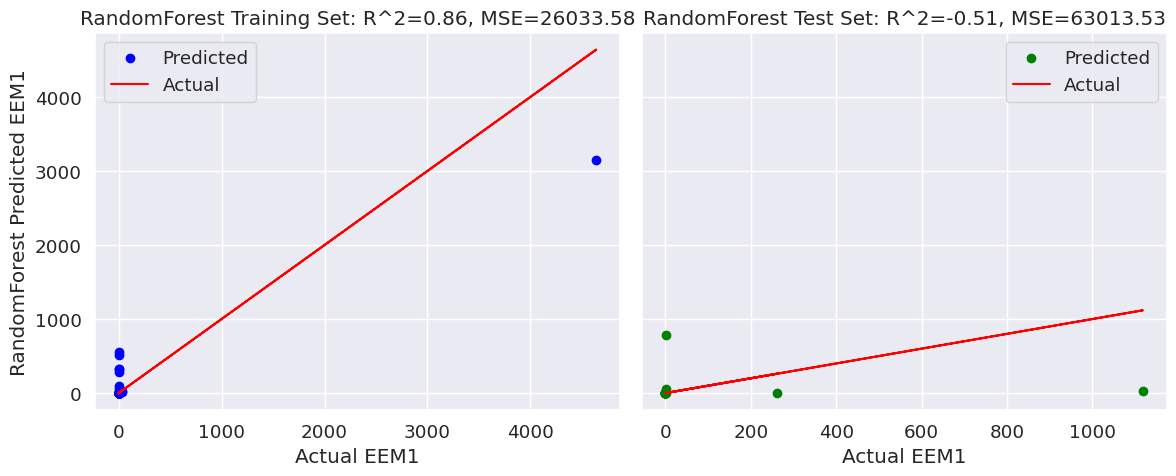

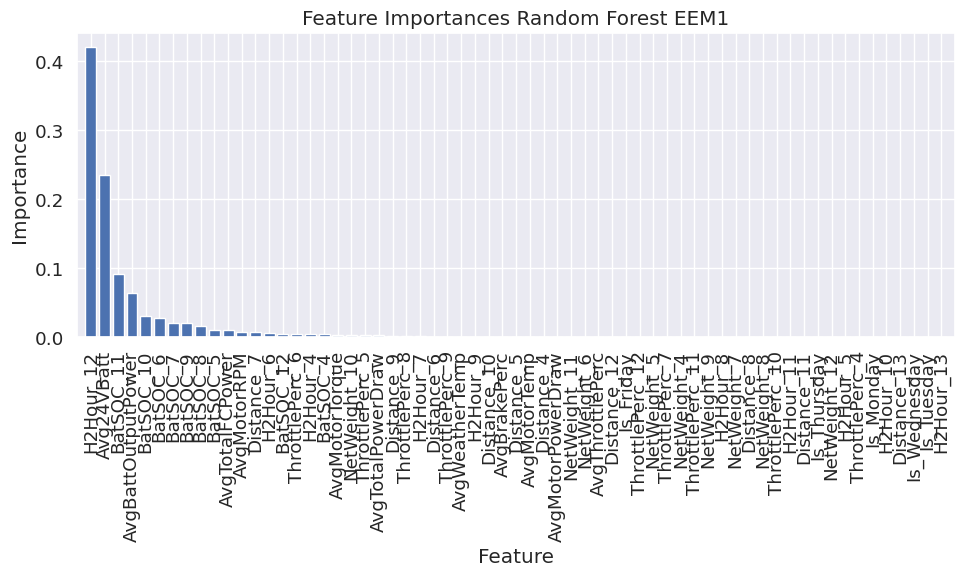

In [364]:
#Plot the the random forest results for EEM1
# Print the performance metrics 
print(f"Training MSE EEM1: {train_mse:.3f}")
print(f"Test MSE EEM1: {test_mse:.3f}")
print(f"Training R^2 EEM1: {train_r2:.3f}")
print(f"Test R^2 EEM1: {test_r2:.3f}")

# Feature Importance
feature_importances = rf.feature_importances_
# Print feature importances
print("Feature Importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance:.3f}")

# Plotting the Actual vs. Predicted values for both training and test sets
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Training set plot
ax[0].scatter(y1_train, y1_train_pred, color='blue', label='Predicted')
ax[0].plot(y1_train, y1_train, color='red', label='Actual')  # A line for perfect predictions
ax[0].set_title(f'RandomForest Training Set: R^2={train_r2:.2f}, MSE={train_mse:.2f}')
ax[0].set_xlabel('Actual EEM1')
ax[0].set_ylabel('RandomForest Predicted EEM1')
ax[0].legend()

# Test set plot
ax[1].scatter(y1_test, y1_test_pred, color='green', label='Predicted')
ax[1].plot(y1_test, y1_test, color='red', label='Actual')  # A line for perfect predictions
ax[1].set_title(f'RandomForest Test Set: R^2={test_r2:.2f}, MSE={test_mse:.2f}')
ax[1].set_xlabel('Actual EEM1')
ax[1].legend()

plt.tight_layout()
plt.show()

# Plotting feature importances
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Sort the indices of feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Get the feature names in the order of importance
sorted_feature_names = X_train.columns[indices]

# Plot the feature importances in descending order
plt.title('Feature Importances Random Forest EEM1')
plt.bar(range(X_train.shape[1]), feature_importances[indices], color='b', align='center')
plt.xticks(range(X_train.shape[1]), sorted_feature_names, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.tight_layout()  # This can help with fitting the labels
plt.show()

In [365]:
#RF Forest EEM2
# Identify timestamp columns
timestamp_columns = X.select_dtypes(include=['datetime64[ns]', 'datetime64']).columns
print(f"Timestamp columns: {timestamp_columns}")

# Select numeric columns and target variable, excluding timestamp columns
X = X.drop(columns=timestamp_columns).select_dtypes(include=[np.number])
y2 = df['EEM2']

# Split the data into training and testing sets
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42)

# Step 1: Scaling the training and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Train the RandomForestRegressor model with scaled data
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y2_train)

# Step 3: Make predictions on the training set and the test set
y2_train_pred = rf.predict(X_train_scaled)
y2_test_pred = rf.predict(X_test_scaled)

# Step 4: Calculate the performance metrics
train_mse = mean_squared_error(y2_train, y2_train_pred)
test_mse = mean_squared_error(y2_test, y2_test_pred)
train_r2 = r2_score(y2_train, y2_train_pred)
test_r2 = r2_score(y2_test, y2_test_pred)

# Print the performance metrics
print(f"Training MSE EEM2: {train_mse:.3f}")
print(f"Test MSE EEM2: {test_mse:.3f}")
print(f"Training R^2 EEM2: {train_r2:.3f}")
print(f"Test R^2 EEM2: {test_r2:.3f}")

# Feature Importance
feature_importances = rf.feature_importances_
# Print feature importances
print("Feature Importances EEM2:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance:.3f}")

Timestamp columns: Index([], dtype='object')
Training MSE EEM2: 2440875.243
Test MSE EEM2: 10750231.545
Training R^2 EEM2: 0.883
Test R^2 EEM2: -550.077
Feature Importances EEM2:
AvgThrottlePerc: 0.000
AvgBrakePerc: 0.015
AvgMotorTemp: 0.000
Avg24VBatt: 0.001
AvgBattOutputPower: 0.002
AvgMotorPowerDraw: 0.000
AvgTotalFCPower: 0.005
AvgTotalPowerDraw: 0.001
AvgMotorRPM: 0.001
AvgMotorTorque: 0.000
NetWeight_4: 0.002
NetWeight_5: 0.243
NetWeight_6: 0.000
NetWeight_7: 0.005
NetWeight_8: 0.176
NetWeight_9: 0.000
NetWeight_10: 0.005
NetWeight_11: 0.008
NetWeight_12: 0.000
Distance_4: 0.165
Distance_5: 0.000
Distance_6: 0.049
Distance_7: 0.170
Distance_8: 0.000
Distance_9: 0.075
Distance_10: 0.011
Distance_11: 0.001
Distance_12: 0.000
Distance_13: 0.000
H2Hour_4: 0.004
H2Hour_5: 0.001
H2Hour_6: 0.000
H2Hour_7: 0.000
H2Hour_8: 0.000
H2Hour_9: 0.001
H2Hour_10: 0.004
H2Hour_11: 0.001
H2Hour_12: 0.000
H2Hour_13: 0.000
AvgWeatherTemp: 0.028
Is_Friday: 0.000
Is_Monday: 0.001
Is_Thursday: 0.001
Is_

Training MSE EEM2: 2440875.243
Test MSE EEM2: 10750231.545
Training R^2 EEM2: 0.883
Test R^2 EEM2: -550.077
Feature Importances EEM2:
AvgThrottlePerc: 0.000
AvgBrakePerc: 0.015
AvgMotorTemp: 0.000
Avg24VBatt: 0.001
AvgBattOutputPower: 0.002
AvgMotorPowerDraw: 0.000
AvgTotalFCPower: 0.005
AvgTotalPowerDraw: 0.001
AvgMotorRPM: 0.001
AvgMotorTorque: 0.000
NetWeight_4: 0.002
NetWeight_5: 0.243
NetWeight_6: 0.000
NetWeight_7: 0.005
NetWeight_8: 0.176
NetWeight_9: 0.000
NetWeight_10: 0.005
NetWeight_11: 0.008
NetWeight_12: 0.000
Distance_4: 0.165
Distance_5: 0.000
Distance_6: 0.049
Distance_7: 0.170
Distance_8: 0.000
Distance_9: 0.075
Distance_10: 0.011
Distance_11: 0.001
Distance_12: 0.000
Distance_13: 0.000
H2Hour_4: 0.004
H2Hour_5: 0.001
H2Hour_6: 0.000
H2Hour_7: 0.000
H2Hour_8: 0.000
H2Hour_9: 0.001
H2Hour_10: 0.004
H2Hour_11: 0.001
H2Hour_12: 0.000
H2Hour_13: 0.000
AvgWeatherTemp: 0.028
Is_Friday: 0.000
Is_Monday: 0.001
Is_Thursday: 0.001
Is_Tuesday: 0.000
Is_Wednesday: 0.000
BatSOC_4: 

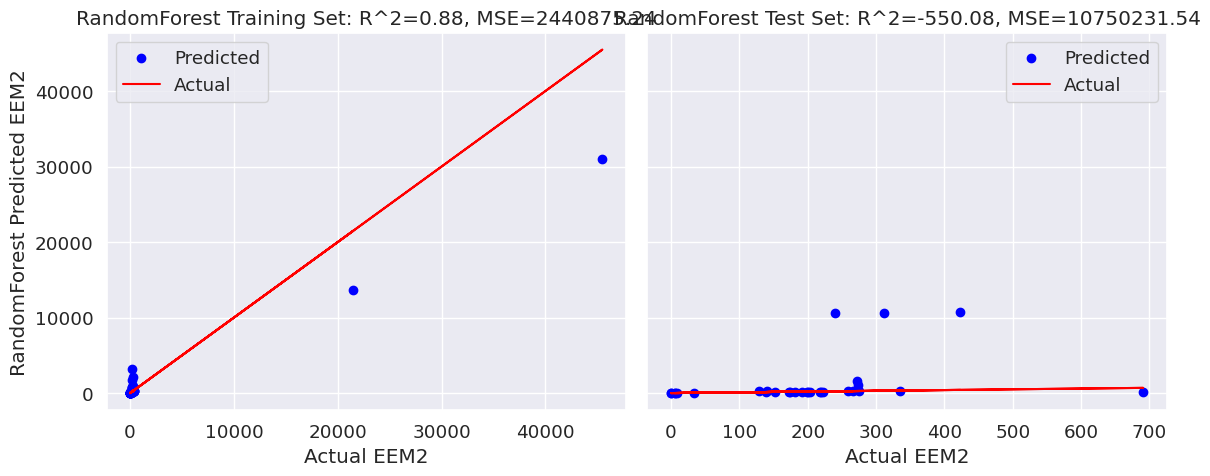

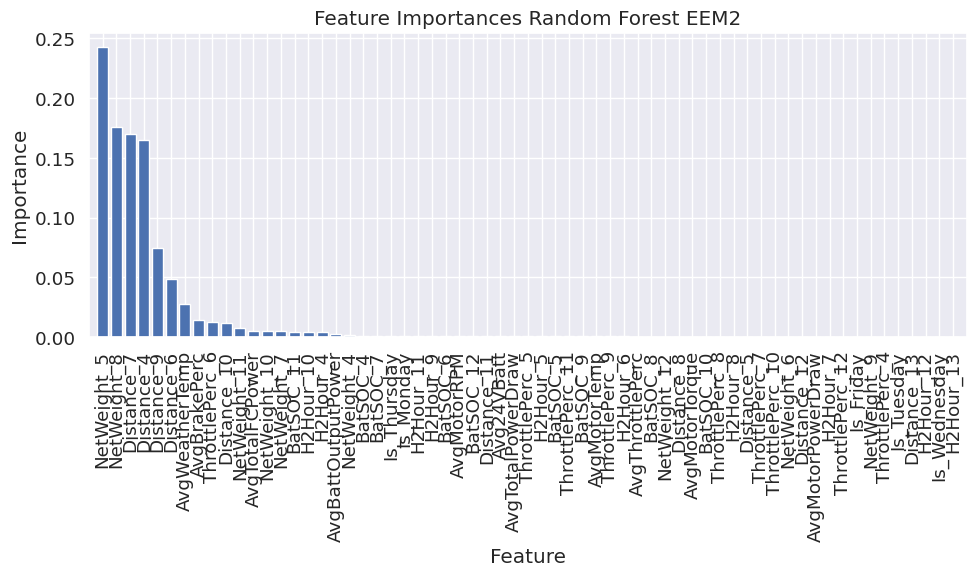

In [366]:
#Plot the the random forest results for EEM2
# Print the performance metrics 
print(f"Training MSE EEM2: {train_mse:.3f}")
print(f"Test MSE EEM2: {test_mse:.3f}")
print(f"Training R^2 EEM2: {train_r2:.3f}")
print(f"Test R^2 EEM2: {test_r2:.3f}")

# Feature Importance
feature_importances = rf.feature_importances_
# Print feature importances
print("Feature Importances EEM2:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance:.3f}")

# Plotting the Actual vs. Predicted values for both training and test sets
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Training set plot
ax[0].scatter(y2_train, y2_train_pred, color='blue', label='Predicted')
ax[0].plot(y2_train, y2_train, color='red', label='Actual')  # A line for perfect predictions
ax[0].set_title(f'RandomForest Training Set: R^2={train_r2:.2f}, MSE={train_mse:.2f}')
ax[0].set_xlabel('Actual EEM2')
ax[0].set_ylabel('RandomForest Predicted EEM2')
ax[0].legend()

# Test set plot
ax[1].scatter(y2_test, y2_test_pred, color='blue', label='Predicted')
ax[1].plot(y2_test, y2_test, color='red', label='Actual')  # A line for perfect predictions
ax[1].set_title(f'RandomForest Test Set: R^2={test_r2:.2f}, MSE={test_mse:.2f}')
ax[1].set_xlabel('Actual EEM2')
ax[1].legend()

plt.tight_layout()
plt.show()

# Plotting feature importances
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Sort the indices of feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Get the feature names in the order of importance
sorted_feature_names = X_train.columns[indices]

# Plot the feature importances in descending order
plt.title('Feature Importances Random Forest EEM2')
plt.bar(range(X_train.shape[1]), feature_importances[indices], color='b', align='center')
plt.xticks(range(X_train.shape[1]), sorted_feature_names, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.tight_layout()  # This can help with fitting the labels
plt.show()

In [367]:
raise SystemExit("Stopping execution of Random Forest at this cell.")

SystemExit: Stopping execution of Random Forest at this cell.

/home/joelva/.pyenv/versions/3.11.5/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3556: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


GBM (Gradient Boosting Machine) , sequentally adds predictors (as in descision trees) whee every added feature corrects its predecessor, thereby imprving the models accuraty step by step.  
GBM iteratively reduce errors using multiple weak learners, making it highly effective for a wide range of problems, 

Training MSE: 0.002
Test MSE: 42062.557
Training R^2: 1.000
Test R^2: -0.005


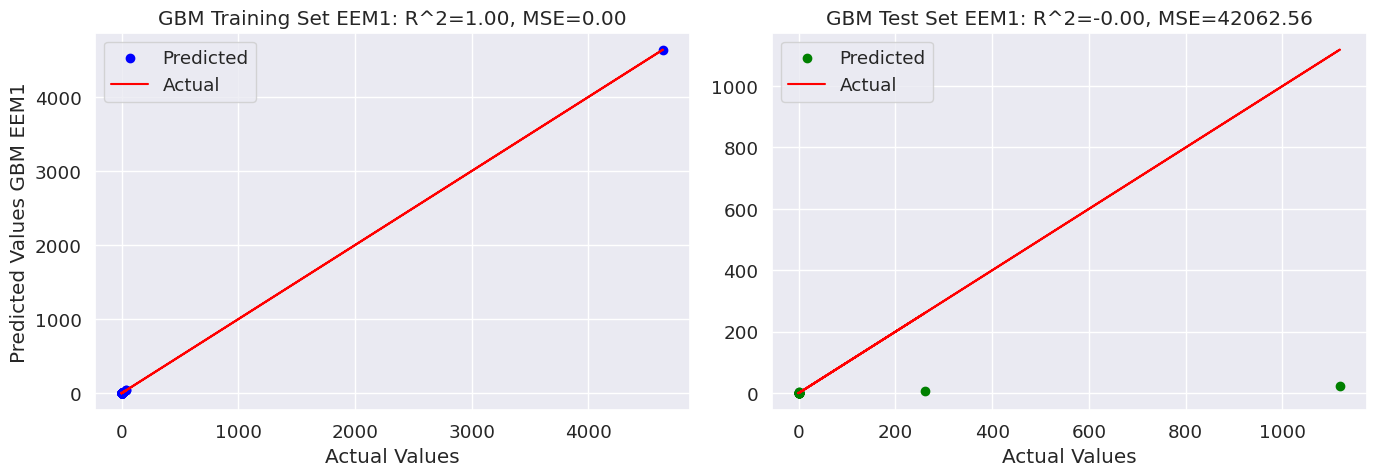

Significant Feature Importances (Value > 0.001):
H2Hour_12: 1.000


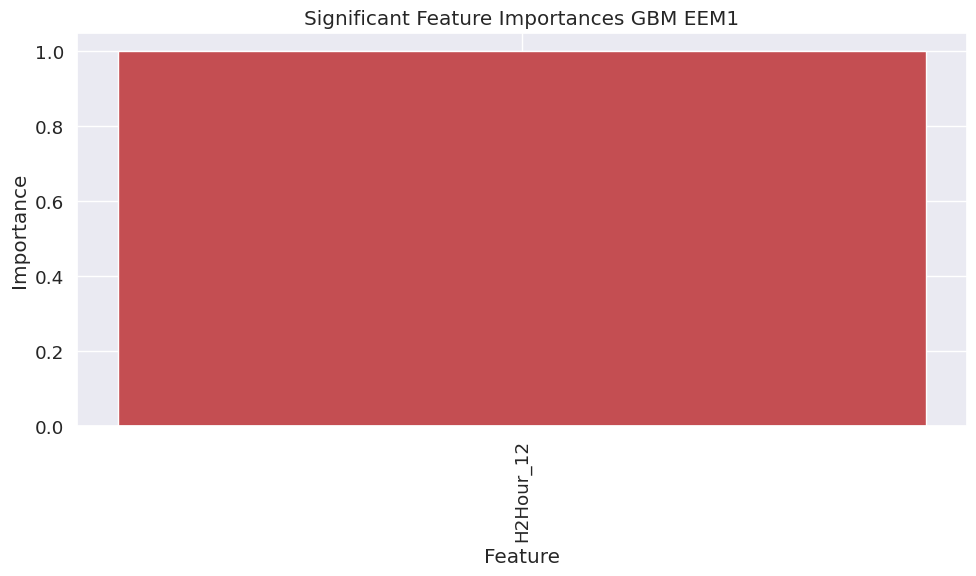

In [368]:
#GBM for EEM1

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train, X_test, y_train, y_test are already defined

# Initialize and fit the Gradient Boosting Regressor
gbm_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm_regressor.fit(X_train, y1_train)

# Predict on training and test sets
y1_train_pred_gbm = gbm_regressor.predict(X_train)
y1_test_pred_gbm = gbm_regressor.predict(X_test)

# Calculate and print performance metrics
train_mse_gbm = mean_squared_error(y1_train, y1_train_pred_gbm)
test_mse_gbm = mean_squared_error(y1_test, y1_test_pred_gbm)
train_r2_gbm = r2_score(y1_train, y1_train_pred_gbm)
test_r2_gbm = r2_score(y1_test, y1_test_pred_gbm)

print(f"Training MSE: {train_mse_gbm:.3f}")
print(f"Test MSE: {test_mse_gbm:.3f}")
print(f"Training R^2: {train_r2_gbm:.3f}")
print(f"Test R^2: {test_r2_gbm:.3f}")

# Plotting Actual vs Predicted values for both training and testing sets
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(y1_train, y1_train_pred_gbm, color='blue', label='Predicted')
axes[0].plot(y1_train, y1_train, color='red', label='Actual')  # Ideal line where predicted values equal actual values
axes[0].set_title(f'GBM Training Set EEM1: R^2={train_r2_gbm:.2f}, MSE={train_mse_gbm:.2f}')
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values GBM EEM1')
axes[0].legend()

axes[1].scatter(y1_test, y1_test_pred_gbm, color='green', label='Predicted')
axes[1].plot(y1_test, y1_test, color='red', label='Actual')
axes[1].set_title(f'GBM Test Set EEM1: R^2={test_r2_gbm:.2f}, MSE={test_mse_gbm:.2f}')
axes[1].set_xlabel('Actual Values')
axes[1].legend()

plt.tight_layout()
plt.show()

# Extracting feature importances
feature_importances_gbm = gbm_regressor.feature_importances_

# Sort the indices of feature importances in descending order
indices = np.argsort(feature_importances_gbm)[::-1]

# Retrieve the sorted feature names based on these indices
sorted_feature_names = X_train.columns[indices]

# Filter features with importance greater than 0.05
significant_indices = indices[feature_importances_gbm[indices] > 0.001]
significant_feature_names = X_train.columns[significant_indices]
significant_importances = feature_importances_gbm[significant_indices]

# Print significant features and their importances
print("Significant Feature Importances (Value > 0.001):")
for feature, importance in zip(significant_feature_names, significant_importances):
    print(f"{feature}: {importance:.3f}")

# Plotting significant feature importances
plt.figure(figsize=(10, 6))
plt.title('Significant Feature Importances GBM EEM1')
plt.bar(range(len(significant_importances)), significant_importances, color='r', align='center')
plt.xticks(range(len(significant_importances)), significant_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()


Training MSE: 274.706
Test MSE: 16490118.352
Training R^2: 1.000
Test R^2: -844.314


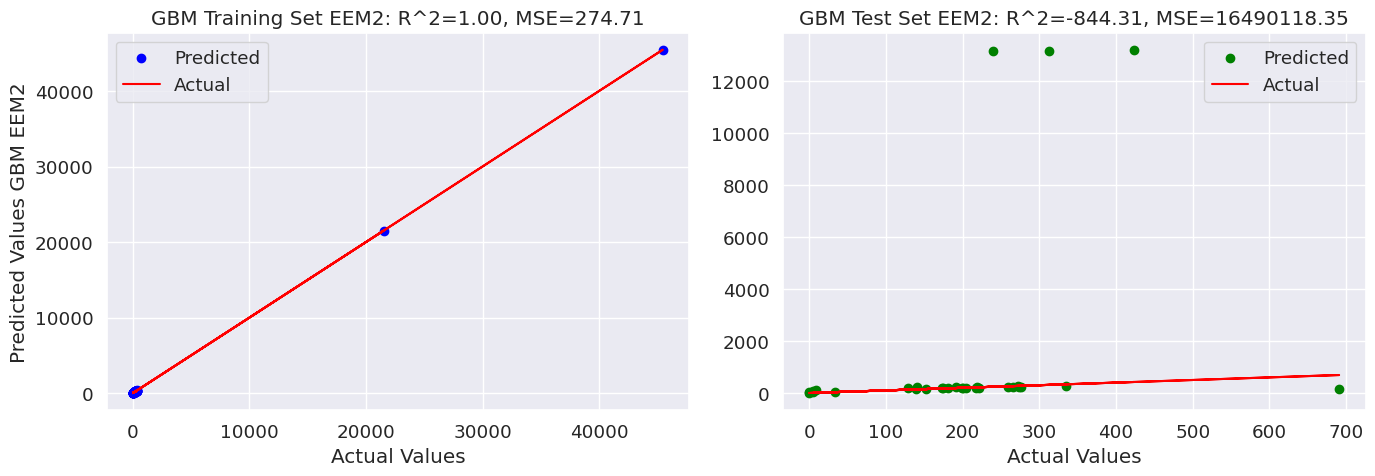

Significant Feature Importances EEM2 (Value > 0.001):
Distance_7: 0.357
NetWeight_8: 0.265
NetWeight_5: 0.194
Distance_4: 0.183


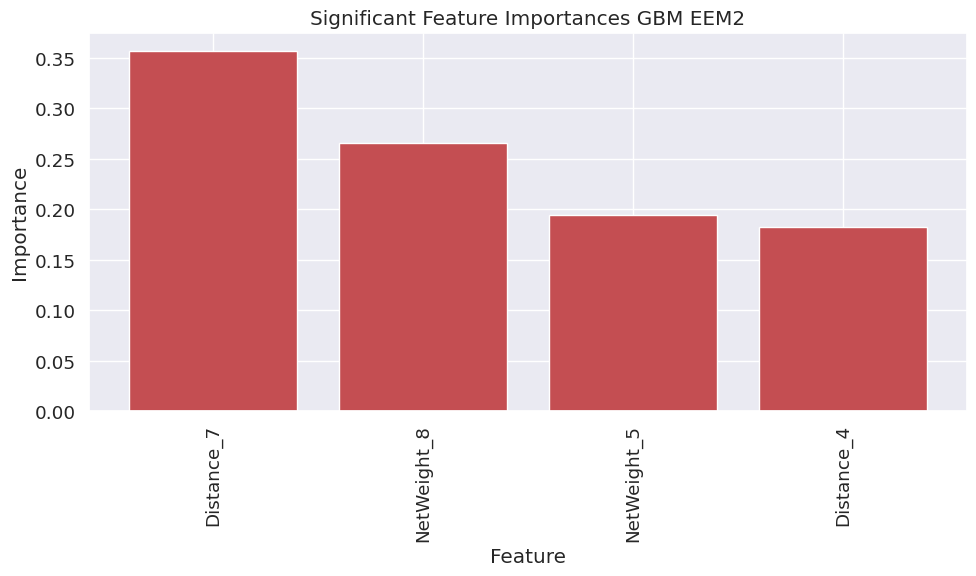

In [369]:
#GBM for EEM2
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train, X_test, y_train, y_test are already defined

# Initialize and fit the Gradient Boosting Regressor
gbm_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm_regressor.fit(X_train, y2_train)

# Predict on training and test sets
y2_train_pred_gbm = gbm_regressor.predict(X_train)
y2_test_pred_gbm = gbm_regressor.predict(X_test)

# Calculate and print performance metrics
train_mse_gbm = mean_squared_error(y2_train, y2_train_pred_gbm)
test_mse_gbm = mean_squared_error(y2_test, y2_test_pred_gbm)
train_r2_gbm = r2_score(y2_train, y2_train_pred_gbm)
test_r2_gbm = r2_score(y2_test, y2_test_pred_gbm)

print(f"Training MSE: {train_mse_gbm:.3f}")
print(f"Test MSE: {test_mse_gbm:.3f}")
print(f"Training R^2: {train_r2_gbm:.3f}")
print(f"Test R^2: {test_r2_gbm:.3f}")

# Plotting Actual vs Predicted values for both training and testing sets
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(y2_train, y2_train_pred_gbm, color='blue', label='Predicted')
axes[0].plot(y2_train, y2_train, color='red', label='Actual')  # Ideal line where predicted values equal actual values
axes[0].set_title(f'GBM Training Set EEM2: R^2={train_r2_gbm:.2f}, MSE={train_mse_gbm:.2f}')
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values GBM EEM2')
axes[0].legend()

axes[1].scatter(y2_test, y2_test_pred_gbm, color='green', label='Predicted')
axes[1].plot(y2_test, y2_test, color='red', label='Actual')
axes[1].set_title(f'GBM Test Set EEM2: R^2={test_r2_gbm:.2f}, MSE={test_mse_gbm:.2f}')
axes[1].set_xlabel('Actual Values')
axes[1].legend()

plt.tight_layout()
plt.show()

# Extracting feature importances
feature_importances_gbm = gbm_regressor.feature_importances_

# Sort the indices of feature importances in descending order
indices = np.argsort(feature_importances_gbm)[::-1]

# Retrieve the sorted feature names based on these indices
sorted_feature_names = X_train.columns[indices]

# Filter features with importance greater than 0.001
significant_indices = indices[feature_importances_gbm[indices] > 0.001]
significant_feature_names = X_train.columns[significant_indices]
significant_importances = feature_importances_gbm[significant_indices]

# Print significant features and their importances
print("Significant Feature Importances EEM2 (Value > 0.001):")
for feature, importance in zip(significant_feature_names, significant_importances):
    print(f"{feature}: {importance:.3f}")

# Plotting significant feature importances
plt.figure(figsize=(10, 6))
plt.title('Significant Feature Importances GBM EEM2')
plt.bar(range(len(significant_importances)), significant_importances, color='r', align='center')
plt.xticks(range(len(significant_importances)), significant_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

In [370]:
raise SystemExit("Stopping execution of GBM  at this cell.")

SystemExit: Stopping execution of GBM  at this cell.

/home/joelva/.pyenv/versions/3.11.5/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3556: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
